# **IS THE US REPUBLICAN PARTY TRULY UNITED?**

**TABLE OF CONTENTS:**
1. Introduction: context, previous studies and data description
2. Preliminary activities: import packages, authentication
3. Download republicans followers
4. Clout and Vulnerability
5. Positioning Maps
6. Sentiment analysis of tweets of politicians
7. Sentiment analysis of tweets of supporters
8. Conclusion

---

## Abstract

US 2020 presidential elections have underlined the variety of opinions within the Grand Old Party, as illustrated by John Kasich’s support to Joe Biden. Even the apparently united ranks of supporters of Donald Trump are in fact characterized by a wide range of political opinion shades. This project aims to reveal the variety and power balance of the main US conservative factions. We focus our analysis on the Twitter accounts of 18 major Republican figures. We first conduct a clout and vulnerability matrix analysis of these 18 accounts in order to identify the main spheres of influence within the Party. We then focus in more detail on the sensibility of these politicians with respect to 3 major political topics of Trump’s era – social issues, environmental cause and openness to the world – through positioning mapping. Finally, in order to specifically bring to light Republicans’ mixed opinions towards Trump, we proceed to a sentiment analysis. The clout and vulnerability analysis and the positioning mapping also highlight a variety of conservative factions – mainly: far-right and Tea party, neoconservative, moderate-liberal and swing-voters factions. The results of the sentiment analysis are more ambiguous. Our first sentiment analysis focuses on the opinion of the 18 selected Republican politicians towards Trump but does not lead us to any strong conclusion because of the overall lack of tweets and because of the presence of a significant positive/neutral sentiment bias. The second sentiment analysis focuses on tweets of Republican supporters. It reveals a profound division among pro-Trump and anti-Trump Republicans. Our analysis helps us to conclude that the GOP is far from being the “Trump Party”. Besides, although the sentiment towards the former US President establishes two main conservative blocks, the GOP is more generally characterized by a significant number of well-identified factions.

---

## 1. Introduction: context, previous studies and data description

The United States is a bipartisan political system, represented by two strong, polarizing forces – the Democratic Party and the Republican Party. It is worth noting that this was not always the case. The Republican Party as we know it emerged from the political realignment of the country during the 1850s. It was founded during that decade in the Northern States, the ones opposing the expansion of slavery. Since that era, the Republican Party has undergone continuous transformation, going from a fairly unified party to an increasingly fragmented one, made up of polarizing factions and interesting contradictions.
In this paper, we will focus on the internal divisions of the Republican Party. To do so, we have selected 18 Republican politicians and we have fetched their followers to carry out several types of analysis. The 18 politicians considered are:
1. Mike Pence (Twitter ID: 'Mike_Pence')
2. Marco Rubio (Twitter ID: 'marcorubio')
3. Ted Cruz (Twitter ID: 'tedcruz')
4. Paul Ryan (Twitter ID: 'SpeakerRyan')
5. Mitt Romney (Twitter ID: 'MittRomney')
6. Lindsey Graham (Twitter ID: 'LindseyGrahamSC')
7. Sarah Palin (Twitter ID: 'SarahPalinUSA')
8. Kevin McCarthy (Twitter ID: 'GOPLeader')
9. John Kasich (Twitter ID: 'JohnKasich')
10. Steve Scalise (Twitter ID: 'SteveScalise')
11. Ben Carson (Twitter ID: 'SecretaryCarson')
12. John Barrasso (Twitter ID: 'SenJohnBarrasso')
13. John Hoeven (Twitter ID: 'SenJohnHoeven')
14. John Thun (Twitter ID: 'SenJohnThune')
15. Mike Enzi (Twitter ID: 'SenatorEnzi')
16. Mike Lee (Twitter ID: 'SenMikeLee')
17. Susan Collins (Twitter ID: 'SenatorCollins')
18. Lisa Murkowski (Twitter ID: 'lisamurkowski')

First, with the **clout and vulnerability analysis**, we recognize the presence of factions within the party. 
Second, we look at how different politicians are positioned with respect to some of the main topics which have been the reason for discussion and disagreement during the Trump administration. We create three **positioning maps**: the first focuses on social issues, looking at the BLM movement and LGBT rights; the second focuses on climate change, having environmental sustainability, and belief in science as criteria; the third focuses on the openness of the US to the world, looking at immigration and international trade support. 
Third, we carry out a **sentiment analysis** to present findings regarding the selected politicians’ approval of Trump. As discussed later, we encountered some difficulties in this part, which led us to include a fourth point of analysis to have a better understanding of the Republican’s approval or disapproval of Trump. 
The last part of our paper moves from politicians to Republican supporters. After selecting about 14,000 Republican accounts, we carry out a **second sentiment analysis** on these accounts’ tweets related to Trump. The final result shows a profound division also among Republican supporters, which are split almost perfectly into two factions: Trump supporters and Republican supporters who do not approve of Trump.


File and Databases:
1. `au.txt`: text file with authentication keys
2. `DB_Republicans_followers`
3. `DB_Republicans_tweets`
4. `DB_Republicans_tweets_filtered`
5. `DB_Republicans_tweets_labelled`
6. `DB_Republicans_supporters`
7. `DB_Supporters_tweets`
8. `DB_Supporters_tweets_filtered`
9. `training_set_supporters`
10. `DB_Supporters_tweets_labelled`
11. `BLM.db`
12. `Environment.db`
13. `Immigration.db`
14. `LGBT.db`
15. `Science.db`
16. `Trade.db`

---

## 2. Preliminary activities: import packages, authentication

### 2.1 Fixed variables: republicans names, start/end date, userid variable, base_dir

In [103]:
rep_names = ['tedcruz', 
             'SenatorEnzi', 
             'Mike_Pence', 
             'SenJohnBarrasso', 
             'SenMikeLee', 
             'SenJohnHoeven', 
             'SenJohnThune', 
             'MittRomney', 
             'JohnKasich', 
             'lisamurkowski', 
             'SecretaryCarson', 
             'SpeakerRyan',
             'SarahPalinUSA',
             'GOPLeader', 
             'LindseyGrahamSC', 
             'SteveScalise', 
             'marcorubio', 
             'SenatorCollins']

start_date = 822230117208518656 # 20th January 2017
end_date = 1322482763832971266 # 31st October 2020

userid = []

base_dir = "" #To be inserted

### 2.2 Import of packages

In [1]:
import json
import tweepy 
import time
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import string
from string import punctuation
import pickle

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import BigramCollocationFinder, BigramAssocMeasures, SnowballStemmer

from collections import Counter

from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.svm import SVC,LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from dateutil.relativedelta import relativedelta
import datetime


### 2.3 Authentication

In [119]:
with open(base_dir + "au_all.txt") as auth_file: #insert authentification file path
    auths = [json.loads(line.strip()) for line in auth_file.read().splitlines()]
    activelist = [tweepy.API(tweepy.AppAuthHandler(authentication[0], authentication[1]), 
                             wait_on_rate_limit=True, wait_on_rate_limit_notify=True) for authentication in auths]
print ("authentication done")

authentication done


---

## 3. Download republicans followers

In this section we are going to download all the follower_ids for each Republican politicians contained in the variable `rep_names`. We will use this database of followers in many ways: clout and vulnerability matrix, positioning maps, download of tweets for each follower_id. We store all the follower_id downloaded, together with the correspoding politician name, in a database called `DB_Republicans_followers`. In order, we create the database and, then, we run a for cycle for downloading the tweets of each handles passed to the code.

In [ ]:
# Creation of a new database for storing the followers id
con = sqlite3.connect(base_dir + "DB_Republicans_followers") 
cur = con.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS followers (Politician_Name, followerid)')
con.commit()

In [ ]:
# Downloading all the followers
handles = rep_names
for hndl in handles:
    print(hndl)
    cursors = [-1]
    api = activelist[0]
    foll = [] 
    ct = 0 
    
    try: 
        while True:  
            if len(set(foll)) == folle:
                break  
            api = activelist[0] 
            cooi = cursors[ct] 
            
            print(cooi) 
            cursor = tweepy.Cursor(api.followers_ids, id = hndl, count =5000, cursor = cooi).pages()
            for i in cursor: 
                foll.extend(i)
                
                nc =cursor.next_cursor
                cursors.append(nc)
                ct += 1
                break
            
            activelist.append(api) 
            activelist.pop(0)
            
            if cooi == 0:
                break
    except:
        pass
    s_foll = set(foll)
    foll = list(s_foll)
    print(hndl, "has", len(foll), "followers")
    g = [(hndl, i) for i in foll]
    cur.executemany('INSERT INTO followers VALUES (?,?)', (g))
    con.commit()
print("All followers fetched")

#We sometimes encountered problems with this code, as once the rate limit was reached, the code would stop downloading tweets
#for the handle it was dealing with, and it would automatically move to the next handle. When this problem was encountered,
#we inserted the number of the page the code had reached before stopping, and we downloaded the remaining followers.

This code suggests we downloaded all the followers for all politicians all at once. Actually, being the amount of data to be downloaded too high, each of us downloaded a slice of the variable `rep_names`. We managed to merge all the singles databases using the following code:

In [ ]:
# Retrieving data of the first database
con = sqlite3.connect(base_dir+'Politician_1') # This is just an example
df1 = pd.read_sql('SELECT * FROM followers', con)
print(df1.shape)

# Retrieving data of the second database
con = sqlite3.connect(base_dir+'Politician_2') # This is just an example
df2 = pd.read_sql('SELECT * FROM followers', con)
print(df2.shape)

# Concatenating the Pandas dataframes
frames = [df1, df2]
df = pd.concat(frames, ignore_index=True)
print(df.shape)
print(df.head(3))

# Creation of a new database
con = sqlite3.connect(base_dir + "DB_Republicans_followers") 
cur = con.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS followers (Politician_Name, followerid)')
con.commit()

# Transfroming Pandas Dataframe into tuples and insert into the db
output = new_df.itertuples(index=False)
data = tuple(output)
cur.executemany("INSERT INTO followers VALUES (?,?)", (data))
con.commit()
print("Database created!")

---

## 4. Clout and Vulnerability

We carry out a clout and vulnerability analysis to see how the different politicians are distributed within the Republican party, from more conservatives to more liberal. To carry out this analysis we use `DB_Republicans_followers`. The main limitation of the analysis is that we have selected a limited sample of politicians, inserting other politicians in the model could strongly affect our results. 

In [ ]:
con=sqlite3.connect(os.path.join(b_dir)+'DB_Republicans_followers.db')
cur = con.cursor()

politicians=list(set(cur.execute("SELECT politicians FROM followers")))
politicians=[p[0] for p in politicians]
print (politicians)

politicians_followers=dict()

for p in politicians:
    politicians_followers['%s' %p]= set(cur.execute("SELECT followerid FROM followers WHERE politicians =='%s'" %p))
    print (p, "done. It has", len(politicians_followers['%s' %p]), "followers")
    
def clout(A,B):
    inters=len(A.intersection(B))
    clout1=inters/len(B)
    return clout1
def vulner(A,B):
    inters=len(A.intersection(B))
    vulner1=inters/len(A)
    return vulner1

CLOUT=dict()
for m in politicians: 
    CLOUT['%s' %m]=dict()

    for p in politicians:
        CLOUT['%s' %m]['%s' %p]=clout(politicians_followers['%s' %m], politicians_followers['%s' %p])
print(CLOUT)

VULN=dict()
for m in politicians: 
    VULN['%s' %m]=dict()

    for p in politicians:
        VULN['%s' %m]['%s' %p]=vulner(politicians_followers['%s' %m], politicians_followers['%s' %p])
print(VULN)
    
df = pd.DataFrame(data=CLOUT)
df = (df.T)
print (df)
df.to_excel('Clout_Vulnerability.xlsx')

The clout and vulnerability analysis clearly shows the multiplicity of positions within the party. 
Reading rows we see the clout scores for each politician, and the highest clout is highlighted in blue. Reading columns, we see the vulnerability scores for each politician, and the highest vulnerability is highlighted with bold red font. We elaborated the data in Excel.

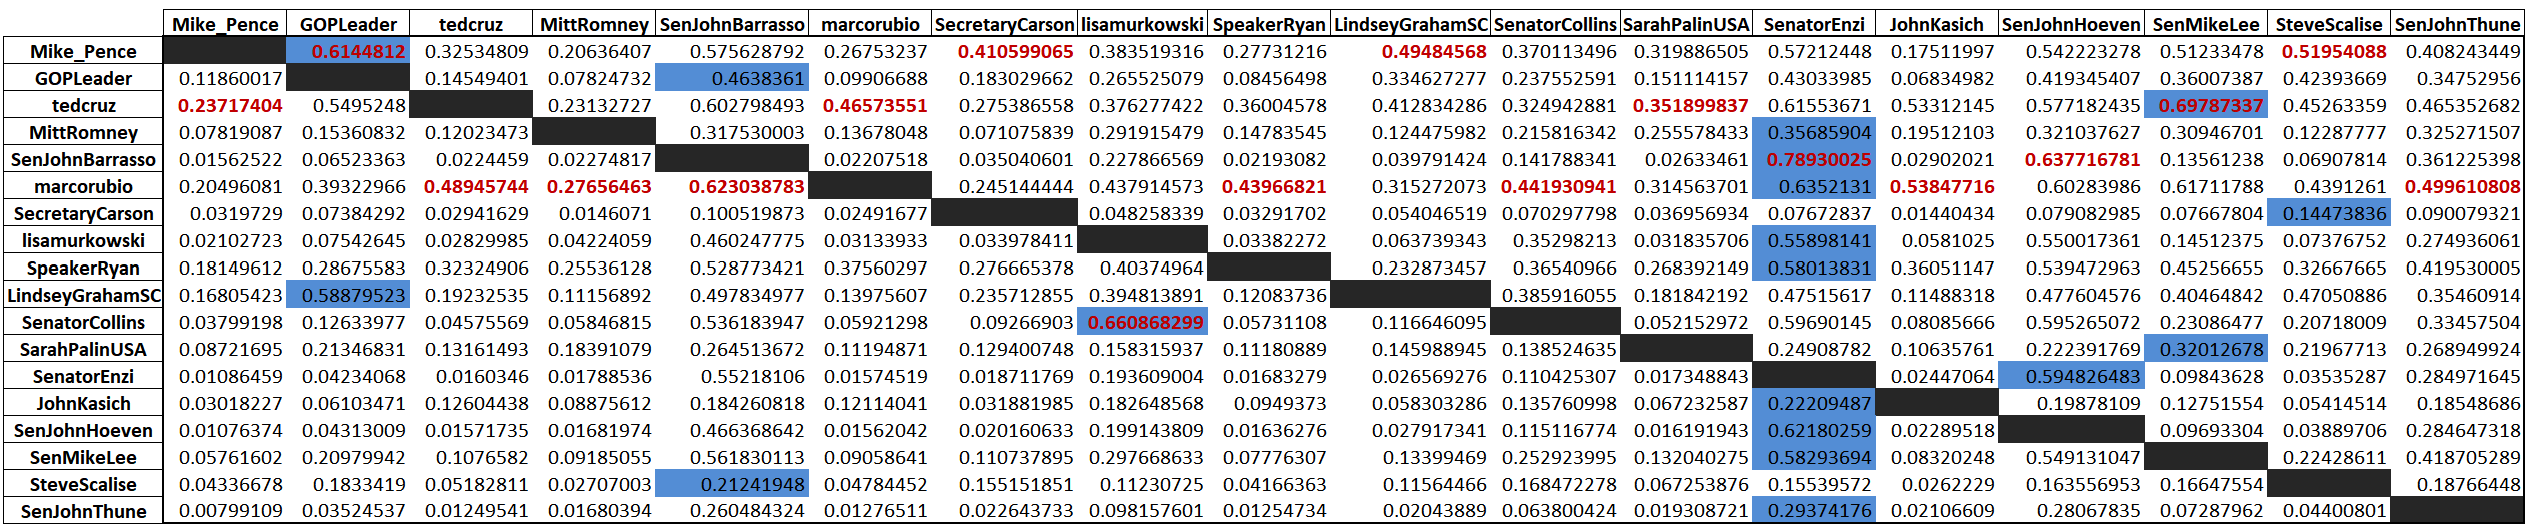

The members considered in the analysis can be quite clearly split into their own party’s factions based on the level of similarity between them. We use previous studies and articles as a basis for the interpretation of our results and for a better split of politicians into factions.

On the _far-right side_ , we have notable personalities such as Mike Enzi, John Hoeven, Ben Carson, John Barasso, Paul Ryan, John Thune, and Kevin McCarthy. From our analysis, we see that all the members of this group have their highest clout on other members of the same group. Specifically:
- Mike Enzi has its highest clout on John Hoeven (0.59483)
- John Hoeven has its highest clout on Mike Enzi (0.62180)
- Ben Carson  has its highest clout on Steve Scalise (0.14474)
- John Barrasso  has its highest clout on Mike Enzi (0.78930)
- Paul Ryan  has its highest clout on Mike Enzi (0.58014)
- Kevin McCarthy  has its highest clout on John Barrasso (0.46384)
- John Thune has its highest clout on Mike Enzi (0.29374)
- John Hoeven has its highest clout on Mike Enzi (0.62180)

Then, we have representatives of _Neoconservatorism_ such as Lindsey Graham and Marco Rubio – which, we must note, have both endorsed Trump after openly criticizing him. Both are very active on Twitter, with a considerable number of followers (about 2 million for Graham, and more than 4 million for Rubio). The active involvement of Graham with the Trump administration can be noticed through the fact that its Twitter account has the highest clout on Kevin McCarthy (0.5888), and it is the most vulnerable to Mike Pence (0.49485). 

Sarah Palin, Mike Pence, Steve Scalise, Ted Cruz all belong to the _Tea Party movement_ , a fiscally conservative political movement within the GOP that aims for lower taxes and supports “small-government principles”, while opposing universal health care. An interesting element to be noticed is that Marco Rubio has highest vulnerability to Ted Cruz (0.46574). At the same time, Ted Cruz has highest vulnerability to Marco Rubio (0.48946). We can thus consider this to politicians as the bridge between the two factions. Besides Cruz, every other politician has the highest vulnerability to other politicians within the faction. In particular:
- Steve Scalise is most vulnerable to Mike Pence (0.51954)
- Sarah Palin is most vulnerable to Ted Cruz (0.3519)
- Mike Pence is most vulnerable to Ted Cruz (0.23717)

On a more economically libertarian note, we have Mike Lee, who might be a bit more _economically liberal_ but is still very much a conservative on crucial social issues such as abortion, and LGBT rights. Both Sarah Palin and Ted Cruz have their highest clout on Mike Lee (0.32013 for Palin, and 0.69787 for Ted Cruz). This could be a signal that, even if Mike Lee is often thought to be part of a different faction, he is still very much connected to the more conservative one.

On a more _moderate but still quite conservative_ side, we can find John Kasich and Mitt Romney. Both have their highest clout on Mike Enzi (0.22209  for Kasich, and 0.35686 for Romney), and they are both most vulnerable to Marco Rubio (0.53848 for Kasich, and 0.27656 for Romney). 

Lastly, _“swing-voters”_ Susan Collins and Lisa Murkowski can be considered the true “calming” and progressive forces of the party, with their pro-choice stance on abortion rights and their deep attention to LGBT rights and women rights. This liberal side of the party strongly contrasts with the strong, conservative views of the rest of the GOP.

---

## 5. Positioning Maps

In order to best capture the variety of opinions within the GOP we decided to focus our positioning map analysis on 3 major aspects of US policies: social issues, environmental issues and openness to the world. These issues have been central to the political discussion during the Trump administration. Hence, we believed this approach could help us to reveal the plurality of views within the party. For each topic we selected two criteria, and we then identified relevant Twitter accounts for each criteria. The exemplar accounts include both Twitter accounts with a high visibility (with up to millions of followers) and some more niche accounts. 
1. **Social issues**: we identified sensibility to BLM cause and sensibility to LGBT rights as the two relevant criteria to conduct a first positioning map. Although Republicans are overall very conservative with respect to these issues, some figures have demonstrated opinions pretty close to those of Democrats. The followers of the selected accounts are contained in two databases: `BLM` and `LGBT`
2. **Environmental issues**: Donald Trump as well as many Republican figures have proved to be very skeptical with respect to the environmental cause. Nevertheless, some members of the GOP seem to be more sensitive to it. Hence, as a first criteria we identified pure sensitivity to the environment, based on a series of exemplar accounts related to this topic. As a second criteria, we identified consideration for science. Given the broad consensus within the scientific world in favor of the environment, we expect to observe a certain correlation between the two. The followers of the selected accounts are contained in two databases: `Environment` and `Science`
3. **Openness to the world**: although Donald Trump put an end to several international trade agreement negotiations, this approach was far from being an historical evidence within the GOP which has been known as the party of free trade for a long time. We expected this topic to be one of the most controversial within the GOP and thus kept it as a first criteria for this last positioning mapping, on the basis of Twitter accounts of organizations supporting international trade and accounts more specifically dealing with US-Mexico and US-China trade. Besides, we observed that Donald Trump’s immigration policy was one of the most debated in the US and wanted to illustrate the diversity of perspectives on immigration within the party, taking pro-immigration and against detention/ICE Twitter influencers as exemplar accounts.The followers of the selected accounts are contained in two databases: `Immigration` and `Trade`

In [3]:
# Function for retrieving the data from the databases and creating a dictionary.
# The argument needed are:
#    1. the end part of the path to the database;
#    2. the list of names to iterate on;
#    3. the name of the column of the subjects interested.
# It returns a dictionary

#base_dir="" #To be inserted only if different from the one declared at the beginning

def retr_data(path_database, name_list, column_name):
    con = sqlite3.connect(base_dir+f'{path_database}')
    cur = con.cursor() 
    aux={}
    for m in name_list:
        aux["{}".format(m)]=set(cur.execute(f"SELECT followerid FROM followers WHERE {column_name}='{m}'"))
    return aux

# We define another two functions for easing the notation
def jaccard(a,b):
    inters=len(a.intersection(b))
    union=len(a.union(b))
    js=inters/union
    wjs=js/len(b)
    return wjs

def spc(followers, num):
    name={} 
    for b in rep_names:
        weighted_jaccard=[]
        for e in followers:
            g=jaccard(pol_followers["%s" %b],followers["%s" %e])
            weighted_jaccard.append(g)
        SPC=sum(weighted_jaccard)*num
        name["%s" %b] = SPC
        name_list = list(name.values())
    return name, name_list

In [5]:
#POLITICIANS
pol_followers = retr_data('DB_Republicans_followers.db', rep_names, 'politicians')
    
num_pol_followers={}
con = sqlite3.connect(base_dir+'DB_Republicans_followers.db')
cur = con.cursor()
for m in rep_names:
    num_pol_followers["{}".format(m)]=len(set(cur.execute("SELECT followerid FROM followers WHERE politicians='%s'" %m)))
print (num_pol_followers)

{'tedcruz': 4018997, 'SenatorEnzi': 104694, 'Mike_Pence': 5513137, 'SenJohnBarrasso': 149652, 'SenMikeLee': 619995, 'SenJohnHoeven': 109442, 'SenJohnThune': 107916, 'MittRomney': 2088915, 'JohnKasich': 950200, 'lisamurkowski': 302269, 'SecretaryCarson': 429302, 'SpeakerRyan': 3608255, 'SarahPalinUSA': 1503155, 'GOPLeader': 1064083, 'LindseyGrahamSC': 1872313, 'SteveScalise': 460189, 'marcorubio': 4223702, 'SenatorCollins': 565921}
<class 'dict'>


In [9]:
#BLM
blm=['deray',
     'aliciagarza',
     'RachelCargle',
     'opalayo',
     'UNHumanRights',
     'renireni', 
     'BerniceKing', 
     'Blklivesmatter', 
     'blackvoices',
     'ColorOfChange', 
     'theGrio', 
     'TheRoot']

blm_followers = retr_data('BLM.db', blm, 'account')

BLM_num = sum([len(v) for v in blm_followers.values()])
print ("The total number of followers of the exemplar accounts related to BLM is", str(BLM_num))

#SPC BLM
blm_SPC, blm_l = spc(blm_followers, BLM_num)
print ("The BLM SPC scores are", blm_SPC)

The total number of followers of the exemplar accounts related to BLM is 7564756
The BLM SPC scores are {'tedcruz': 0.7935036052497322, 'SenatorEnzi': 1.5663224173964465, 'Mike_Pence': 0.6430633944076375, 'SenJohnBarrasso': 1.4555359254407896, 'SenMikeLee': 1.2341826725839196, 'SenJohnHoeven': 1.5103606903167779, 'SenJohnThune': 1.0729402958284775, 'MittRomney': 1.7719127354055193, 'JohnKasich': 1.880820256464841, 'lisamurkowski': 3.9496179794301605, 'SecretaryCarson': 0.5569693245991705, 'SpeakerRyan': 1.055723428881621, 'SarahPalinUSA': 0.762003681608178, 'GOPLeader': 0.7717065856451566, 'LindseyGrahamSC': 1.0507269058982736, 'SteveScalise': 0.4712237246819327, 'marcorubio': 0.8647212601997423, 'SenatorCollins': 3.0050702746703624}


In [10]:
#LGBT
lgbt=['glaad',
      'PFLAG',
      'JoeMyGod', 
      'autostraddle',
      'pride_site', 
      'VictoryFund',
      'NOH8Campaign',
      'NewNowNext', 
      'TheAdvocateMag',
      'outmagazine']

lgbt_followers = retr_data('LGBT.db', lgbt, 'handle')

LGBT_num = sum([len(v) for v in lgbt_followers.values()])
print ("The total number of followers of the exemplar accounts related to LGBT is", str(LGBT_num))

#SPC LGBT
lgbt_SPC, lgbt_l = spc(lgbt_followers, LGBT_num)
print ("The LGBT SPC scores are", lgbt_SPC)

The total number of followers of the exemplar accounts related to LGBT is 2290930
The LGBT SPC scores are {'tedcruz': 0.1796574462089444, 'SenatorEnzi': 0.7913974669004583, 'Mike_Pence': 0.15633602648141084, 'SenJohnBarrasso': 0.6888152563349921, 'SenMikeLee': 0.43514985245579124, 'SenJohnHoeven': 0.759480504695829, 'SenJohnThune': 0.5844566395967608, 'MittRomney': 0.4858930535174159, 'JohnKasich': 0.5038824205034262, 'lisamurkowski': 1.425296051633525, 'SecretaryCarson': 0.12796128867388085, 'SpeakerRyan': 0.2543122157691603, 'SarahPalinUSA': 0.2917042350162545, 'GOPLeader': 0.2424092473034563, 'LindseyGrahamSC': 0.2795750475398989, 'SteveScalise': 0.16026888042188572, 'marcorubio': 0.20502354829293676, 'SenatorCollins': 1.0097476097955818}


In [6]:
#IMMIGRATION
imm=['CrisAlexJimenez',
     'CHIRLA',
     'FWDus',
     'JuanSaaa',
     'DefineAmerican',
     'MigrationPolicy',
     'UNITEDWEDREAM',
     'NatImmForum',
     'fams2gether', 
     'DetentionWatch',
     'joseiswriting',
     'immcouncil',
     'AmericasVoice',
     'DreamAct',
     'AILANational',
     'WeAreUnidosUS',
     'NIJC',
     'popdemoc', 
     'RAICESACTION']

imm_followers = retr_data('Immigration.db', imm, 'Influencer_Name')

IMM_num = sum([len(v) for v in imm_followers.values()])
print ("The total number of followers of the exemplar accounts related to immigration is", str(IMM_num))

#SPC IMMIGRATION
imm_SPC, imm_l = spc(imm_followers, IMM_num)
print ("The immigration SPC scores are", imm_SPC)

The total number of followers of the exemplar accounts related to immigration is 826777
The immigration SPC scores are {'tedcruz': 0.30534180758605045, 'SenatorEnzi': 2.0843566454617095, 'Mike_Pence': 0.22064716512411586, 'SenJohnBarrasso': 1.702565249706716, 'SenMikeLee': 0.9866217829195543, 'SenJohnHoeven': 1.99953751490447, 'SenJohnThune': 1.5978955117280236, 'MittRomney': 0.718295074675659, 'JohnKasich': 0.8350051032531068, 'lisamurkowski': 2.828650326191927, 'SecretaryCarson': 0.3074481638984276, 'SpeakerRyan': 0.41687993207010837, 'SarahPalinUSA': 0.36091620931874485, 'GOPLeader': 0.5362719404939866, 'LindseyGrahamSC': 0.5103965378199531, 'SteveScalise': 0.4072004237216315, 'marcorubio': 0.4089903772143574, 'SenatorCollins': 1.7926799281765478}


In [8]:
#TRADE
trade=['TradeGov', 
       'ForeignPolicy',
       'ChinaUSATrade',
       'NAFTANEXT',
       'MexicoInstitute',
       'NCUSCR', 
       'wto',
       'ExportGov', 
       'OECD',
       'MxUSTrade',
       'IMFNews',
       'FTC']

trade_followers = retr_data('Trade.db', trade, 'handle')

TRADE_num = sum([len(v) for v in trade_followers.values()])
print ("The total number of followers of the exemplar accounts related to trade is", str(TRADE_num))

#SPC TRADE
trade_SPC, trade_l = spc(trade_followers, TRADE_num)
print ("The trade SPC scores are", trade_SPC)

The total number of followers of the exemplar accounts related to trade is 4182424
The trade SPC scores are {'tedcruz': 1.217656234067955, 'SenatorEnzi': 5.503862027412953, 'Mike_Pence': 1.1446890484719479, 'SenJohnBarrasso': 5.024828603050022, 'SenMikeLee': 2.7054201950829584, 'SenJohnHoeven': 5.34867238169299, 'SenJohnThune': 5.5066744819366935, 'MittRomney': 1.9912803043720837, 'JohnKasich': 1.7298749494995114, 'lisamurkowski': 4.197818701603754, 'SecretaryCarson': 1.2781569275119016, 'SpeakerRyan': 1.4295656538054213, 'SarahPalinUSA': 1.3585694373483275, 'GOPLeader': 2.008339809642537, 'LindseyGrahamSC': 1.4334648745048877, 'SteveScalise': 1.5310620397416885, 'marcorubio': 1.348960016475268, 'SenatorCollins': 2.900947946255467}


In [12]:
#ENVIRONMENT
env=['UNEP', 
     'foe_us', 
     'guardianeco', 
     'SierraClub',
     'YaleE360',
     'Greenpeace', 
     'nature_org', 
     'HuffPostGreen',
     'ClimateReality',
     'EnvAgency']

env_followers = retr_data('Environment.db', env, 'handle')

ENV_num = sum([len(v) for v in env_followers.values()])
print ("The total number of followers of the exemplar accounts related to environment is", str(ENV_num))

#SPC ENVIRONMENT
env_SPC, env_l = spc(env_followers, ENV_num)
print ("The environment SPC scores are", env_SPC)

The total number of followers of the exemplar accounts related to environment is 5285110
The environment SPC scores are {'tedcruz': 0.46681366038160493, 'SenatorEnzi': 1.2215677127120144, 'Mike_Pence': 0.4366037036326067, 'SenJohnBarrasso': 1.2109315194413977, 'SenMikeLee': 0.9252630807043617, 'SenJohnHoeven': 1.2451279127212032, 'SenJohnThune': 0.7023875976652026, 'MittRomney': 0.9015434670122896, 'JohnKasich': 0.7329157138189473, 'lisamurkowski': 1.9599745186210664, 'SecretaryCarson': 0.3047493445178429, 'SpeakerRyan': 0.6104049552349641, 'SarahPalinUSA': 0.5604995304328652, 'GOPLeader': 0.5406201443445235, 'LindseyGrahamSC': 0.5161559969834747, 'SteveScalise': 0.2176181095912157, 'marcorubio': 0.4980121321817771, 'SenatorCollins': 1.3843850855273658}


In [15]:
#SCIENCE
scie=['NewsfromScience',
      'NSF',
      'nprscience',
      'TheScientistLLC',
      'CellPressNews', 
      'PopSci',
      'ScienceDaily',
      'sciam', 
      'ReutersScience']

scie_followers = retr_data('Science.db', scie, 'accounts')  # ARE WE SURE?

SCIE_num = sum([len(v) for v in scie_followers.values()])
print ("The total number of followers of the exemplar accounts related to science is", str(SCIE_num))

#SPC SCIENCE
scie_SPC, scie_l = spc(scie_followers, SCIE_num)
print ("The science SPC scores are", scie_SPC)

The total number of followers of the exemplar accounts related to science is 8398283
The science SPC scores are {'tedcruz': 0.5875386031799282, 'SenatorEnzi': 0.7066067795684043, 'Mike_Pence': 0.4760887269198161, 'SenJohnBarrasso': 0.7100602673965188, 'SenMikeLee': 0.7347897293733553, 'SenJohnHoeven': 0.6687693159216416, 'SenJohnThune': 0.544054353024474, 'MittRomney': 0.8821674262669585, 'JohnKasich': 0.8578570102965175, 'lisamurkowski': 1.0686153120082018, 'SecretaryCarson': 0.28874303001297386, 'SpeakerRyan': 0.7113481884664049, 'SarahPalinUSA': 0.70698969243738, 'GOPLeader': 0.5096908344065547, 'LindseyGrahamSC': 0.5377945623181242, 'SteveScalise': 0.30529631991240047, 'marcorubio': 0.5729029450208643, 'SenatorCollins': 0.8533067478209251}


In [16]:
# Defining some last useful variables
followers_l=list(num_pol_followers.values())
pol_l=list(trade_SPC.keys())
print (pol_l)

#Rescale the values of follower_l for visualization purposes
followers_l2=[1/1000*n for n in followers_l]

['tedcruz', 'SenatorEnzi', 'Mike_Pence', 'SenJohnBarrasso', 'SenMikeLee', 'SenJohnHoeven', 'SenJohnThune', 'MittRomney', 'JohnKasich', 'lisamurkowski', 'SecretaryCarson', 'SpeakerRyan', 'SarahPalinUSA', 'GOPLeader', 'LindseyGrahamSC', 'SteveScalise', 'marcorubio', 'SenatorCollins']


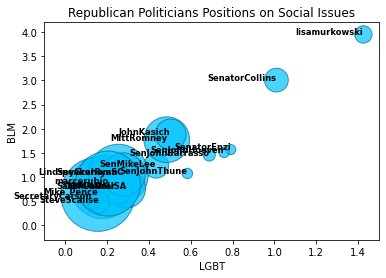

In [24]:
# Positioning map SOCIAL ISSUES

fig, ax = plt.subplots()

ax.scatter(lgbt_l,blm_l,s=followers_l2,c="#00c3ff",alpha=0.7,edgecolors='#006d8f')

plt.xlim((-0.1, 1.5))
plt.ylim((-0.3, 4.2))

for i, txt in enumerate(pol_l):
    ax.annotate(txt, (lgbt_l[i],blm_l[i]),size='small', color='black', weight='semibold',
                horizontalalignment='right')
plt.xlabel("LGBT")
plt.ylabel("BLM")
plt.title("Republican Politicians Positions on Social Issues", loc="center")
manager = plt.get_current_fig_manager()
#manager.resize(*manager.window.maxsize()) 
    #We inserted this command to get a bigger and higher quality map.
    #Using Spyder or Jupyter this command often returns an error. This error is not present when 
    #the code is run directlyfrom the terminal.
plt.show()

##### **Positioning map #1: Social Issues**
This first positioning map reflects a significant variety of opinions within the GOP. First, without surprise, Lisa Murkowski and Susan Collins clearly stand out of the selection of Republican politicians in terms of sensibility to BLM and LGBT rights. Second, we can clearly identify a majority of figures with common conservative positions with respect to these topics. We can notice that Secretary Ben Carson seems to be one of the most reluctant to these concerns, with very low SPC in both cases, which is perfectly consistent with his reputation as a far-right politician. Steve Scalise’s positioning on this map also reflects his strong opposition to BLM and LGBT rights. Third, a small pool of moderate figures stands out with intermediate SPC: this observation makes sense in the case of Mitt Romney and John Kasich, both known for their anti-Trump and quite moderate views. However, the positioning of Mike Enzi, John Hoeven, and John Barrasso is more puzzling as most of their votes illustrate a strongly conservative understanding of BLM and LGBT rights. Let us notice however that on the long trend these 3 politicians have often completely changed their opinions (on topics such as abortion or same-sex marriage). Hence, their intermediate positioning on the social mapping might be interpreted as the reflection of their opportunistic behavior.

Below we report two screens of the map. The first is of the entire map, while the second is a zoom on the bottom left corner of the map, to better show the dispositions of the polticians in that area. Running the code directly from the terminal, we obtain an interactive map on which we can zoom. 

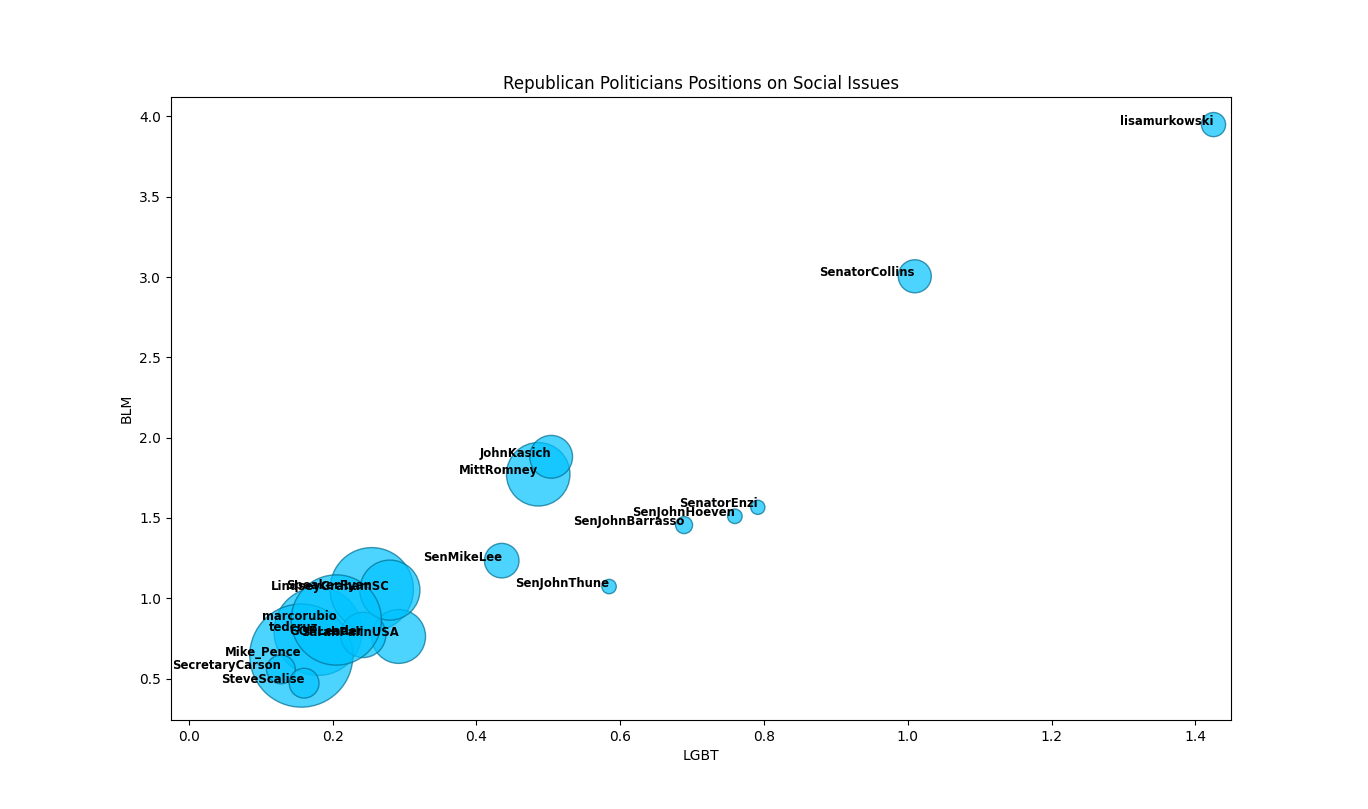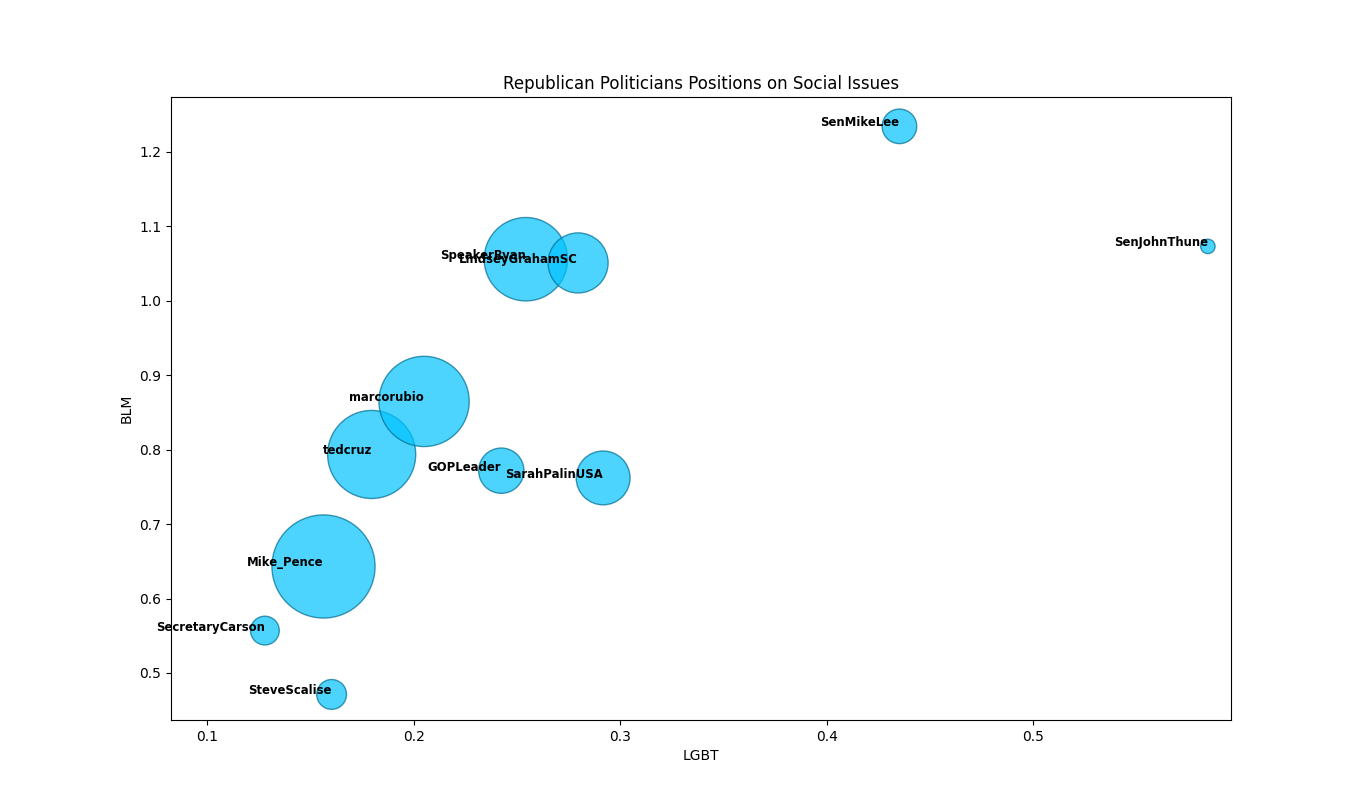

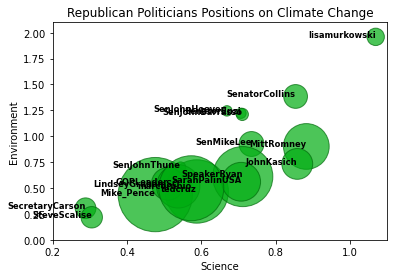

In [21]:
# Positioning map ENVIRONMENT
fig, ax = plt.subplots()

ax.scatter(scie_l,env_l,s=followers_l2,c="#00ad11",alpha=0.7,edgecolors='#006b0b')

plt.xlim((0.2, 1.1))
plt.ylim((0, 2.1))

for i, txt in enumerate(pol_l):
    ax.annotate(txt, (scie_l[i],env_l[i]),size='small', color='black', weight='semibold',
                horizontalalignment='right')
plt.xlabel("Science")
plt.ylabel("Environment")
plt.title("Republican Politicians Positions on Environmental Issues", loc="center")
manager = plt.get_current_fig_manager()
#manager.resize(*manager.window.maxsize()) 
    #We inserted this command to get a bigger and higher quality map.
    #Using Spyder or Jupyter this command often returns an error. This error is not present when 
    #the code is run directlyfrom the terminal.
plt.show()

##### **Positioning map #2: Climate Change** 
Overall, the structure of this second positioning map is very similar to that of the first one. In particular, we observe that Lisa Murkowski and Susan Collins have very progressive views in terms of environmental concerns, which goes with a high sensitivity towards science. We can then identify an intermediate pool, comprising the more moderate Mitt Romney, John Kasich, and Mike Lee and the more puzzling cases of Mike Enzi, John Hoeven, and John Barrasso. Then, a majority of Republicans figures, of which Mike Pence, Ted Cruz, Marco Rubio or Lindsey Graham are characterized by a reasonable sensitivity to science but at the same time by an extremely low attention to the environmental cause. In this case, compared to the first positioning map, Ben Carson and Steve Scalise appear to stand out more significantly from this pool of Republicans due to an extremely low science SPC score. We can interpret this positioning as the reflection of their populist positions – rather than purely conservative ones – which is consistent with their strong support for President Trump, who has himself denigrated scientific work. 

Below we report two screens of the map. The first is of the entire map, while the second is a zoom on the bottom central part of the map, to better show the dispositions of the polticians in that area.

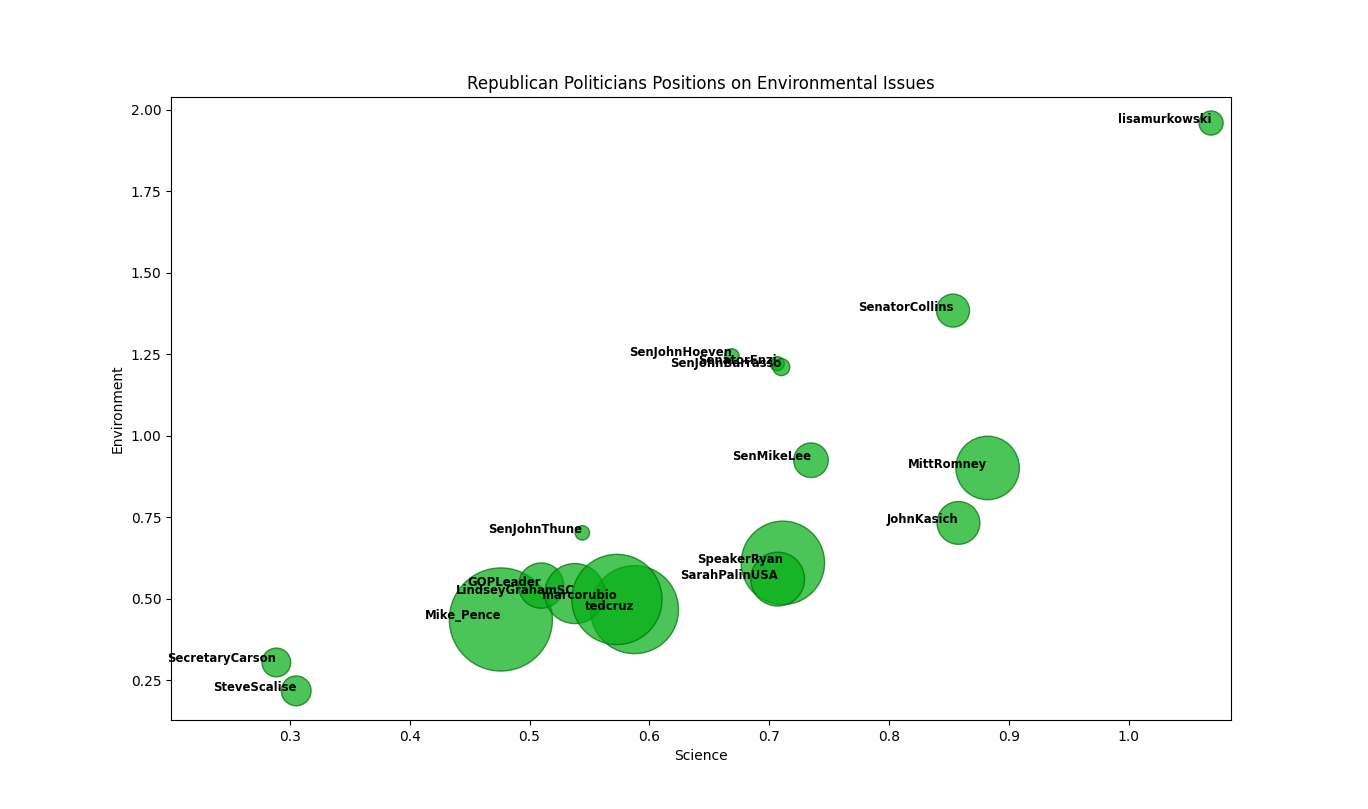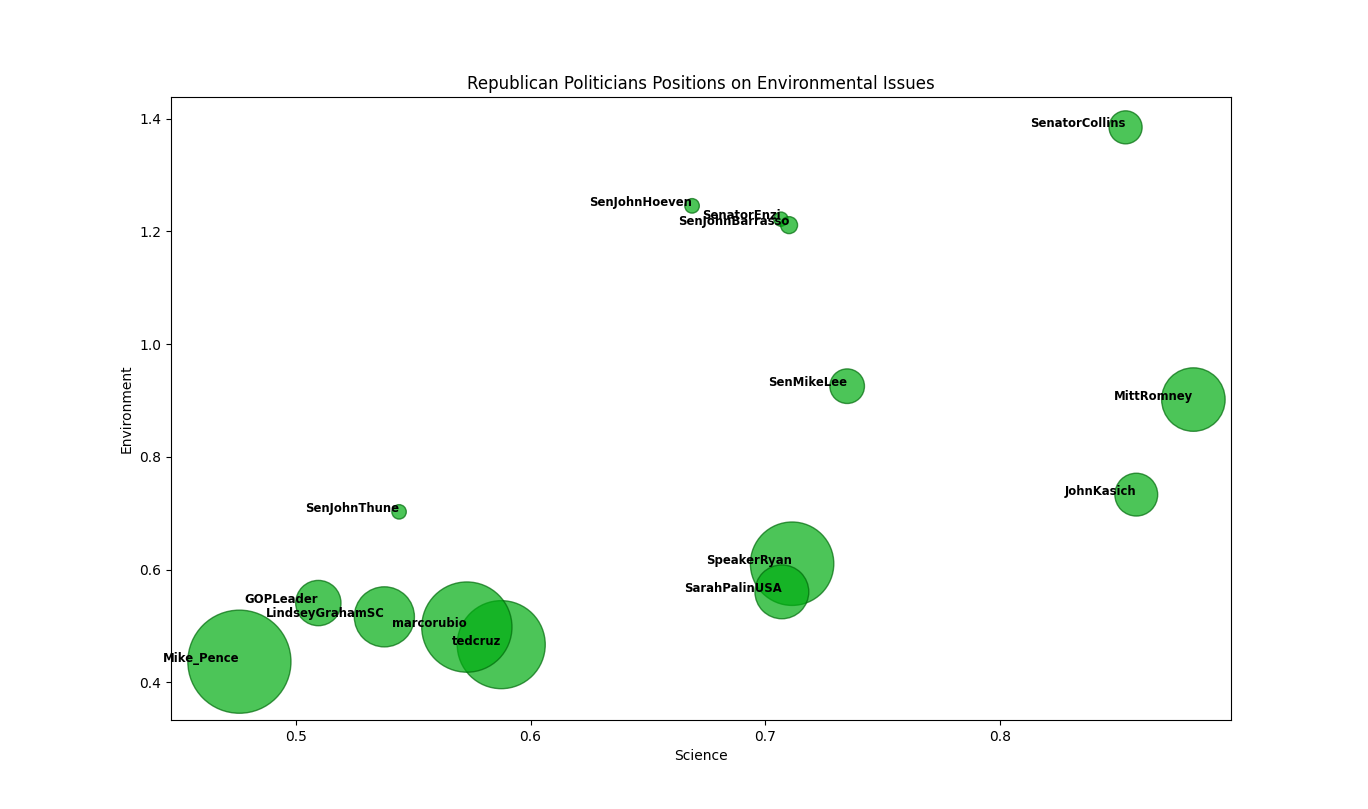

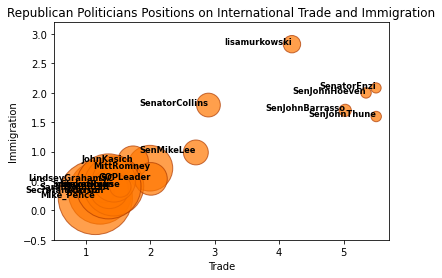

In [32]:
# Positioning map OPENNESS TO THE WORLD
fig, ax = plt.subplots()

ax.scatter(trade_l,imm_l,s=followers_l2,c="#ffc016",alpha=0.7,edgecolors='#cf8d03')

plt.xlim((0.5, 5.7))
plt.ylim((-0.5, 3.2))

for i, txt in enumerate(pol_l):
    ax.annotate(txt, (trade_l[i],imm_l[i]),size='small', color='black', weight='semibold',
                horizontalalignment='right')
plt.xlabel("Trade")
plt.ylabel("Immigration")
plt.title("Republican Politicians Positions on International Trade and Immigration", loc="center")
manager = plt.get_current_fig_manager()
#manager.resize(*manager.window.maxsize()) 
    #We inserted this command to get a bigger and higher quality map.
    #Using Spyder or Jupyter this command often returns an error. This error is not present when 
    #the code is run directlyfrom the terminal.
plt.show()

##### **Positioning map #3: Openness to the World**
The third positioning map seems to illustrate a structure also similar to the two previous ones. Let us note however that in this case, the consensus among the majority of Republican politicians seem to be even more evident. Most of the selected figures have very low trade and immigration SPC belonging to the same narrow range (Ben Carson, Steve Scalise, Mike Pence, Ted Cruz, Marco Rubio, Lindsey Graham, Sarah Palin). Hence, in terms of immigration, President Trump's opinions seem to receive the support from a majority of Republican politicians. Similarly, his reluctance towards international trade agreements appear to have convinced the majority of the GOP. In this case again, Lisa Murkowski appears to be the most liberal one, closely followed by Susan Collins. Once again, John Kasich and Mitt Romney demonstrate a more moderate positioning. 
Trade is definetely not the most debated topic within the GOP: the party is  not the party of free trade anymore. This observation could be interpreted as a strong influence of Donald Trump’s views within his party. However, let us recall that the questioning of globalization within the GOP started before Trump’s emergence within the party – this positioning map hence reflects a more long-trend mutation of the Republicans [1] 

Below we report two screens of the map. The first is of the entire map, while the second is a zoom on the bottom left corner of the map, to better show the dispositions of the polticians in that area.

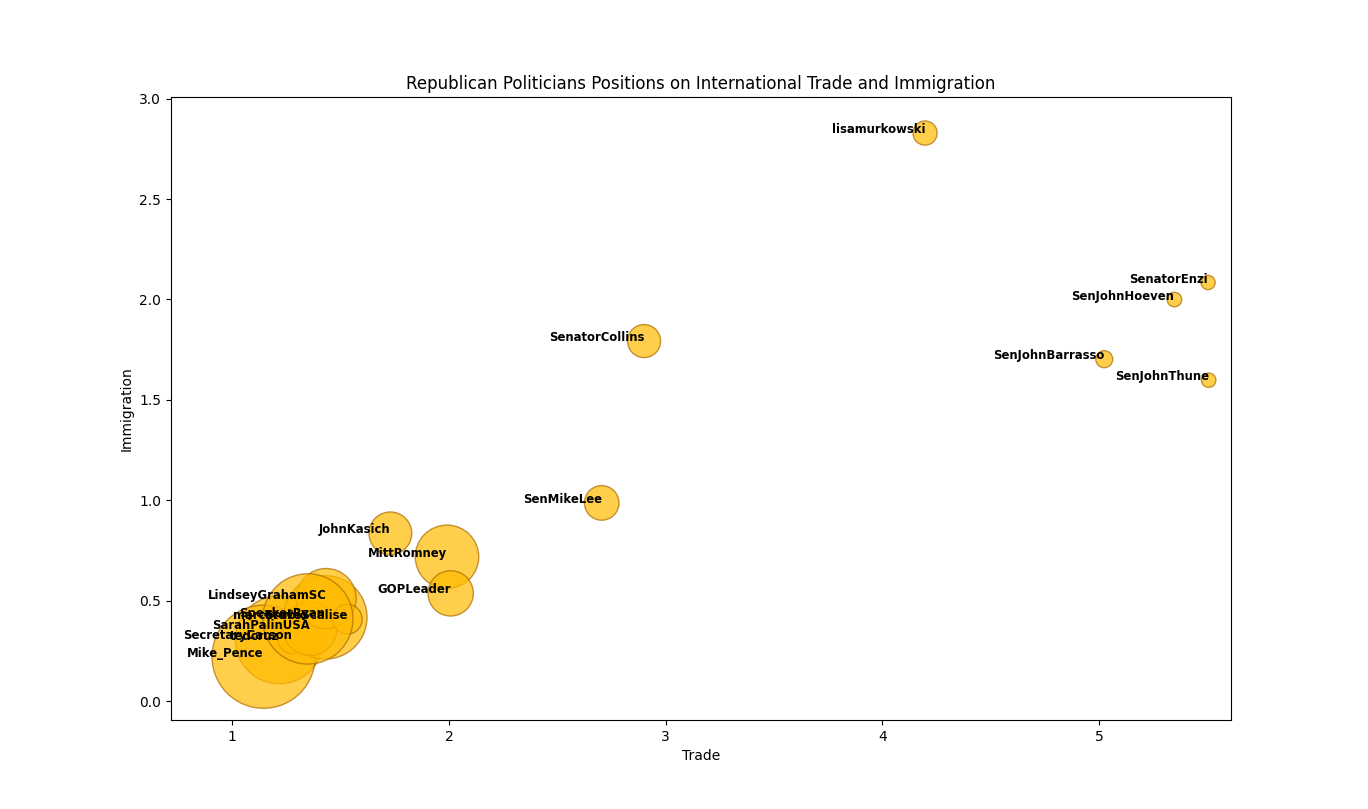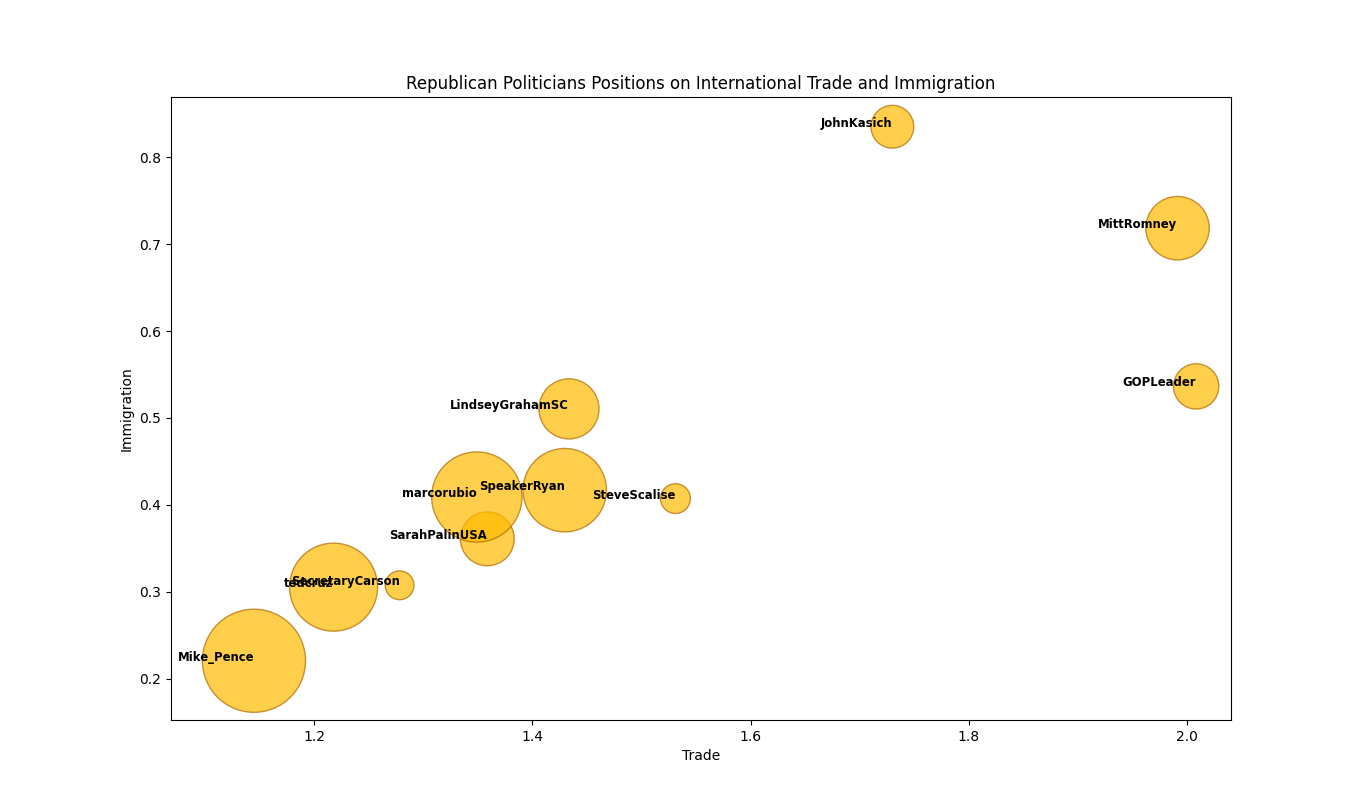

Lastly, we unite the three positioning maps previously created. Our aim is to test our hypothesis that the presence of factions within the party translates into politicians being more or less conservatives on all the issues considered.

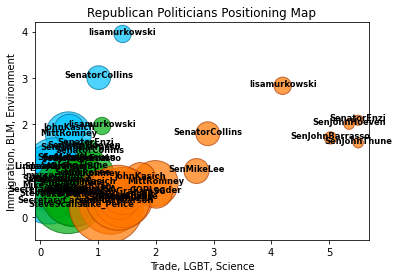

In [33]:
fig, ax = plt.subplots()

ax.scatter(lgbt_l,blm_l,s=followers_l2,c="#00c3ff",alpha=0.7,edgecolors='#006d8f', label = 'Social Issues')
ax.scatter(scie_l,env_l,s=followers_l2,c="#00ad11",alpha=0.7,edgecolors='#006b0b', label = 'Climate Change')
ax.scatter(trade_l,imm_l,s=followers_l2,c="##ffc016",alpha=0.7,edgecolors='#cf8d03', label = "Openness")

for i, txt in enumerate(pol_l):
    ax.annotate(txt, (trade_l[i],imm_l[i]),size='small', color='black', weight='semibold',
                horizontalalignment='center')
for i, txt in enumerate(pol_l):
    ax.annotate(txt, (lgbt_l[i],blm_l[i]),size='small', color='black', weight='semibold',
                horizontalalignment='center')
for i, txt in enumerate(pol_l):
    ax.annotate(txt, (scie_l[i],env_l[i]),size='small', color='black', weight='semibold',
                horizontalalignment='center')

plt.xlim((-0.1, 5.7))
plt.ylim((-0.5, 4.2))

plt.xlabel("Trade, LGBT, Science")
plt.ylabel("Immigration, BLM, Environment")
plt.title("Republican Politicians Positioning Map", loc="center")
manager = plt.get_current_fig_manager()
#manager.resize(*manager.window.maxsize())
    #We inserted this command to get a bigger and higher quality map.
    #Using Spyder or Jupyter this command often returns an error. This error is not present when 
    #the code is run directlyfrom the terminal.
plt.show()  
#plt.savefig('Positioning_republicans_ALL.png')

Combining the three maps together, we can visually confirm that the distribution of positioning of the selected Republican politicians is the same to a large extent, whatever the topic considered. Our hypothesis is confirmed. Below we report two screens of the map. The first is of the entire map, while the second is a zoom on the bottom left corner of the map, to better show the dispositions of the polticians in that area.

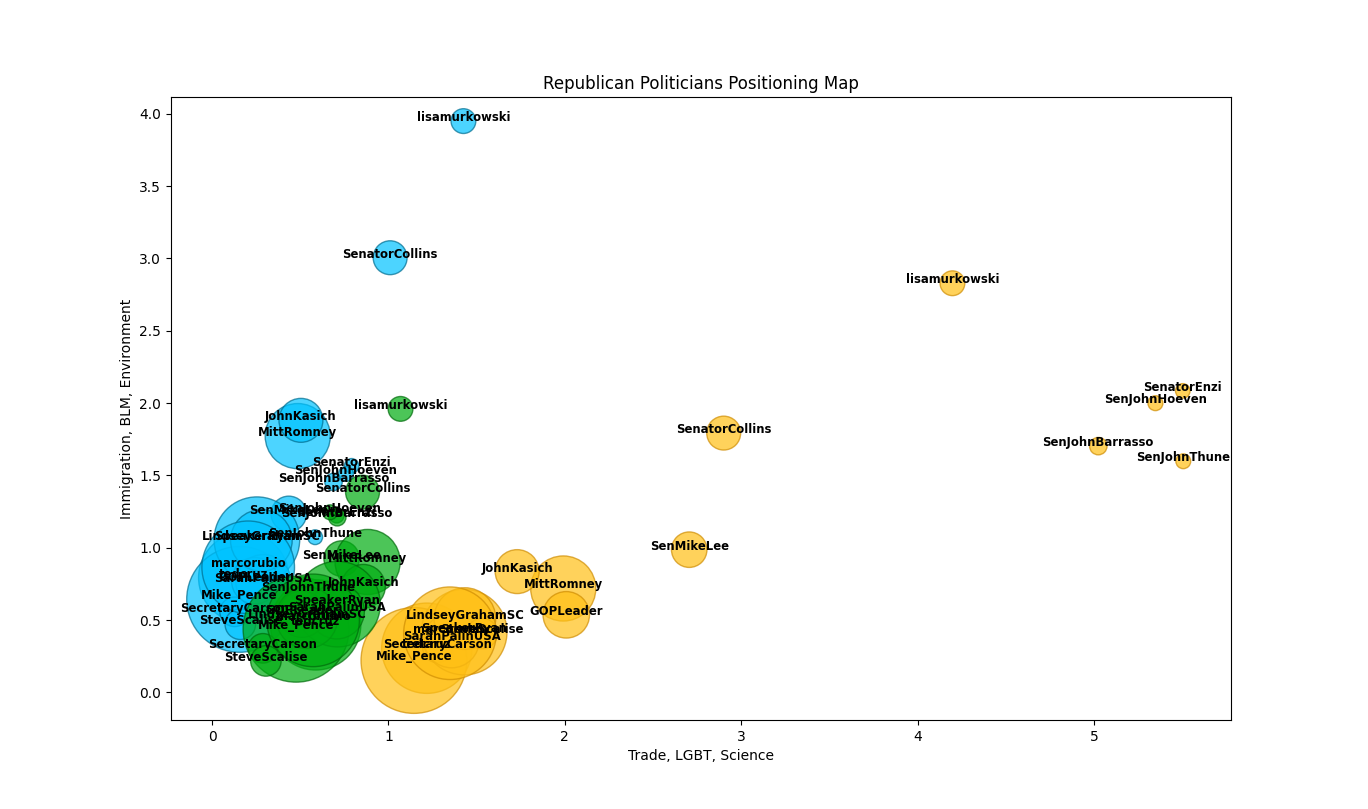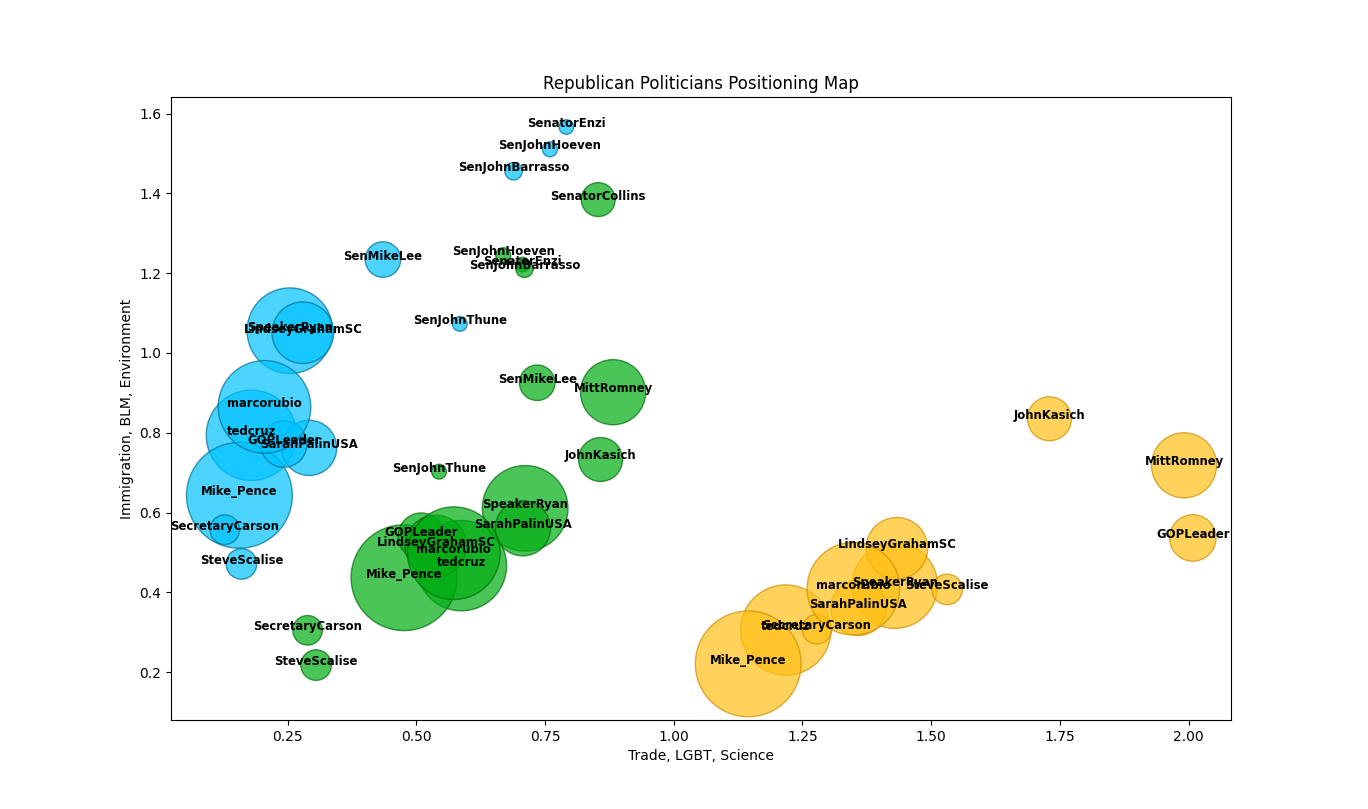

---

## 6. Sentiment analysis of tweets of politicians

It has often been stated by the media that the GOP is now the “Trump party”. This is partially true, but not completely. It highlights, however, a sort of “identity crisis” in Republicans, who are either Trump supporters or Trump detractors. Ben Carson, with his strong, conservative views and his outspoken support of the current President, is probably the best advocate for “Trumpism”. On the other hand, Senator Lindsey Graham has openly criticized Donald Trump in countless interviews, only to defend him later on in his campaign, as did Marco Rubio. We must also cite the late John McCain as one of the GOP’s strongest Trump opposers, a figure that highly influenced the more moderate side of the party to take a stance against Trump and his rhetoric – take, for instance, Mitt Romney’s comments about Donald Trump’s campaign. 
Starting from this premise, our intent was to show the different opinions that Republican politicians have on Trump. To do so we fetched tweets from the 18 Republican politicians mentioned above, and, after filtering them, we carried out a sentiment analysis. Unfortunately, the findings from the analysis did not provide the significant insight we were expecting. 


### 6.1 Download tweets of politicians

The variable which contains all the politicians ids is the list `rep_names`. We will store all the tweets in a database called `DB_Republicans_tweets`. This database will contain 10 columns: politician_name, tweet_id, created_at, text, retweets, favorites, hashtags, links, mentions, media.

In [34]:
print(f'We have {len(rep_names)} politicians in our list')
print(f'List of politicians: {rep_names}')

We have 18 politicians in our list
List of politicians: ['tedcruz', 'SenatorEnzi', 'Mike_Pence', 'SenJohnBarrasso', 'SenMikeLee', 'SenJohnHoeven', 'SenJohnThune', 'MittRomney', 'JohnKasich', 'lisamurkowski', 'SecretaryCarson', 'SpeakerRyan', 'SarahPalinUSA', 'GOPLeader', 'LindseyGrahamSC', 'SteveScalise', 'marcorubio', 'SenatorCollins']


In [36]:
# creation of new database
con = sqlite3.connect(base_dir + "DB_Republicans_tweets.db")
cur = con.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS tweets(politician_name, tweet_id, created_at, text, retweets, favorites, hashtags, links, mentions, media)')
con.commit()

In [37]:
# function for using different APIs when rate limit is reached
def limit(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            print("New API")
            activelist.append(api)
            activelist.pop(0)
            api = activelist[0]

In [ ]:
# Downloading the tweets and storing into the database
api = activelist[0]

for hndl in rep_names:
    
    rep_tweets = [] 
    try:
        for tweet in limit(tweepy.Cursor(api.user_timeline, id = hndl, since_id = start_date, max_id=end_date, tweet_mode="extended", count=200).pages()):
            for status in tweet:

                tweet = status.full_text.replace("\r", " ").replace("\n", " ").replace("\r\n", " ")
                
                hashtaglist=[hashtag["text"] for hashtag in status.entities["hashtags"]]
                hashtag_string=",".join(hashtaglist)
        
                linklist=[link["expanded_url"] for link in status.entities["urls"]]
                link_string=",".join(linklist)
        
                mentions=[mention["screen_name"] for mention in status.entities["user_mentions"]]
                mentions_string=",".join(mentions)
        
                try:
                    medialist=[media["expanded_url"] for media in status.entities["media"]]
                    media_string=",".join(medialist)
                except:
                    media_string='' 
                
                aux = (
                    hndl,
                    status.id, 
                    status.created_at, 
                    tweet,
                    status.retweet_count,
                    status.favorite_count,
                    hashtag_string,
                    link_string,
                    mentions_string,
                    media_string  
                        ) 
        
                rep_tweets.append(aux)                           
                
    except:
        pass
        
    s_foll = set(rep_tweets)
    rep_tweets = list(s_foll)
    
    print(f'Number of tweets downloaded for {hndl}: {len(rep_tweets)}')

    cur.executemany('INSERT INTO tweets VALUES (?,?,?,?,?,?,?,?,?,?)', (rep_tweets))
    con.commit()
    
print("All tweets fetched")

The database contains 47,034 tweets. These tweets of course needs to be filtered for certains keywords.

### 6.2 Filtering for non-relevant tweets

The filtering will proceed as follows. We define two lists of keywords: `keywords` and `keywords_del`. The former will contain the keywords that each tweet has to contain in order to be stored in the database. The latter will contain the keywords that if founded in the tweet will determine the elimination of such tweet. The two lists has been created after a process of trial and error. In particular, we added the second filtering step to avoid having too many tweets unrelated to the purpose of our analysis.

For this first sentiment analysis as we are considering only politicians and in a reduced number, we defined the following keywords, not having the necessity to filter out any additional keywords.

In [44]:
# Here are the two variables
keywords = ["trump",
            "potus",
            "President of the United States",
            "Our president",
            "maga2020",
            "maga",
            "trumppence2020",
            "realDonaldTrump",
           "notmypresident"]
keywords_merge2 = '|'.join(keywords)

keywords_del =  ['§§§'] # Here we use this three symbols as we don't wanna filter out any additional keywords
keywords_del_merge2 = '|'.join(keywords_del)

We define a function for filtering that will be used also later on. The filtering will function as follows. We apply on each column selected the function  `str.contains` which will give back a boolean with **True** value everywhere a keyword is founded. We filter the column `tweet_id` for this boolean and store the ids into a list. Of course, each tweet_id will likely be present more than once in the list since a certain keyword can be found in multiple columns. Thus, we eliminate the duplicates. We do the same thing with the tweet_ids of the tweets that need to be deleted. Now, we have two lists: `useful_tweet_ids` with the ids to be kept and `del_tweet_id` with the ids to be eliminated.
We remove the elements of `del_tweet_id` from `useful_tweet_ids`, creating a temporary variable `DIFF`, which will contains only the ids of interest. We transform this list in a DataFrame called `prov_df`. Finally, we merge `prov_df`with `df`. This will give back a new dataframe filtered which we will then store into a new database.

In [39]:
def filtering(df, keywords_merge, keywords_del_merge):

    # A selection of columns to look into
    columns = ["text", "hashtags", "links", "mentions", "media"]

    print("Let's begin the filtering")

    # Filtering per column
    useful_tweet_id = []
    del_tweet_id = []

    for i in columns:
        aux_db = df[i]

        boolean_int = aux_db.str.contains(keywords_merge, case = False, na = False, regex = True)
        a = df['tweet_id'][boolean_int]
        b = list(a)
        useful_tweet_id.extend(b)

        boolean_del = aux_db.str.contains(keywords_del_merge, case = False, na = False, regex = True)
        c = df['tweet_id'][boolean_del]
        d = list(c)
        del_tweet_id.extend(d)

    print('Filtering part completed')

    print(f"useful_tweet_id length is now {len(useful_tweet_id)}")
    print(f"del_tweet_id length is now {len(del_tweet_id)}")

    # Eliminating duplicates
    aux_list = set(useful_tweet_id)
    useful_tweet_id = list(aux_list)
    print(
        f"useful_tweet_id length, after eliminating duplicates, is now {len(useful_tweet_id)}"
    )

    aux_list = set(del_tweet_id)
    del_tweet_id = list(aux_list)
    print(
        f"del_tweet_id length, after eliminating duplicates, is now {len(del_tweet_id)}"
    )

    # Keeping only relevant ids
    DIFF = set(useful_tweet_id) - set(del_tweet_id)
    print(f'Final length is {len(DIFF)}')

    # Transforming the list into a pandas dataframe and checking
    prov_df = pd.DataFrame(DIFF, columns = ['tweet_id'])
    print(prov_df.shape)

    # Keeping only the rows of the relevant tweet_ids
    new_df = pd.merge(prov_df, df, how='inner', on=['tweet_id'])
    print(f'The shape of the filtered DB is {new_df.shape}')
    
    return new_df

In [48]:
# Connection to the database with all the tweets
con = sqlite3.connect(base_dir + "DB_Republicans_tweets.db")
df = pd.read_sql("SELECT * FROM tweets", con)
print(f'df shape is {df.shape}')

df shape is (47034, 10)


In [49]:
# We apply the function for filtering
new_df = filtering(df, keywords_merge2, keywords_del_merge2)

Let's begin the filtering
Filtering part completed
useful_tweet_id length is now 11353
del_tweet_id length is now 0
useful_tweet_id length, after eliminating duplicates, is now 6142
del_tweet_id length, after eliminating duplicates, is now 0
Final length is 6142
(6142, 1)
The shape of the filtered DB is (6142, 10)


In [50]:
# The merging part will actually invert the first two column. We re-order the column for consistency
new_df = new_df[['politician_name', 'tweet_id', 'created_at', 'text', 'retweets',
                  'favorites', 'hashtags', 'links', 'mentions', 'media']]

In [9]:
# Exporting in Excel
new_df.to_excel('DB_Republicans_tweets_filtered.xlsx')
print("ALL DONE")

The data we get is quite limited, for a total of 6142 tweets. Moreover, this data is disproportionally divided among politicians. For example, we obtain 1650 tweets by Mike Pence, but only 260 tweets by Marco Rubio, and, even worse, only 10 tweets by Mitt Romney. Since the final goal of the sentiment analysis was to show how different politicians have different opinions about Donald Trump, the distribution of data represents a problem. While for some politicians the amount of data we have is enough to obtain significant results from the sentiment analysis, for some others the number of tweets is so limited that we could not attain significant results from our analysis. Nevertheless, we decided to proceed with the analysis to see where it would lead us. 

### 6.3 Sentiment analysis of politicians

#### Importing data and visualization

We are importing the same excel file just created. What is different is that we labelled randomly around 600 of them (and deleted the one we thought were misleading). Now the database contains 6027 observations.

In [51]:
df = pd.read_excel(base_dir + "DB_Republicans_tweets_filtered.xlsx")
df = df.rename(columns = {'Unnamed: 0':'original_index'})
df['Label'] = df['Label'].str.capitalize()
print(df.shape)
df.head(3)

(6027, 12)


,original_index,tweet_id,politician_name,created_at,text,retweets,favorites,hashtags,links,mentions,media,Label
0,0,1320169055756615936,LindseyGrahamSC,2020-10-25 01:03:25,RT @JudgeJeanine: TONIGHT AT 9PM ET! @LindseyG...,521,0,NaN,NaN,"JudgeJeanine,LindseyGrahamSC,GOPLeader,LaraLea...",NaN,Neutral
1,1,1319441497943571968,LindseyGrahamSC,2020-10-23 00:52:21,"➡️ A weakened, dispirited American military. ...",48,159,TrumpPence2020,NaN,NaN,NaN,Positive
2,2,1314033305059196928,LindseyGrahamSC,2020-10-08 02:42:08,An outstanding job by Vice President @Mike_Pen...,2112,12506,VPdebate,NaN,Mike_Pence,NaN,Positive


While labelling these tweets we noticed a large number of ‘neutral’ tweets, in which politicians would simply report some news, without expressing any opinion on Trump. Moreover, there was a very limited number of ‘negative’ tweets, even from those politicians who are known to have openly opposed Trump. Often, these politicians would simply tweet a link to their interview, rather than tweeting negative comments. 

In [52]:
df = df[['tweet_id','politician_name', 'created_at', 'text','Label']]
display (df.head())
df.shape

,tweet_id,politician_name,created_at,text,Label
0,1320169055756615936,LindseyGrahamSC,2020-10-25 01:03:25,RT @JudgeJeanine: TONIGHT AT 9PM ET! @LindseyG...,Neutral
1,1319441497943571968,LindseyGrahamSC,2020-10-23 00:52:21,"➡️ A weakened, dispirited American military. ...",Positive
2,1314033305059196928,LindseyGrahamSC,2020-10-08 02:42:08,An outstanding job by Vice President @Mike_Pen...,Positive
3,1284203082780377088,LindseyGrahamSC,2020-07-17 19:07:28,"Secondly, the comments of Peter Strzok regardi...",Neutral
4,1285253714710757120,LindseyGrahamSC,2020-07-20 16:42:19,If federal law enforcement officials are neces...,Positive


(6027, 5)

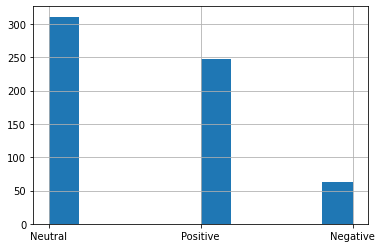

In [53]:
df['Label'].hist();

#### Text pre-processing

In [54]:
myre = re.compile(u'['
    u'\U0001F300-\U0001F64F'
    u'\U0001F680-\U0001F6FF'
    u'\u2600-\u26FF\u2700-\u27BF]+', 
    re.UNICODE)

stop_words = set(stopwords.words('english'))


def CleanTweets(tweet):
    tweet=str(tweet)
    tweet=' '.join(word for word in tweet.split(' ') if not word.startswith('@'))
    tweet=' '.join(word for word in tweet.split(' ') if not word.startswith('#')) #this removes all the hashtags
    tweet = ''.join(c for c in tweet if c not in string.punctuation)
    tweet = tweet.lower().strip()
    tweet = re.sub('((www\S+)|(http\S+))', '', tweet) #url links
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    tweet = re.sub('(rt\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    tweet = re.sub('[0123456789%]', '', tweet) #numbers and percentage sign
    tweet = re.sub(' +',' ', tweet)
    tweet = re.sub('myre',' ', tweet)
    tweet=re.sub('amp;', ' ', tweet)
    tweet=tweet.encode("ascii", errors="ignore").decode() #remove weird characters you may have in your tweets due to weird encoding
    text = tweet.split()
    text = ' '.join(word for word in text if word not in stop_words)
    return text

In [55]:
df['tweet_clean'] = df['text'].apply(CleanTweets)
df.head(3)

,tweet_id,politician_name,created_at,text,Label,tweet_clean
0,1320169055756615936,LindseyGrahamSC,2020-10-25 01:03:25,RT @JudgeJeanine: TONIGHT AT 9PM ET! @LindseyG...,Neutral,rt tonight pm et joining
1,1319441497943571968,LindseyGrahamSC,2020-10-23 00:52:21,"➡️ A weakened, dispirited American military. ...",Positive,weakened dispirited american military united s...
2,1314033305059196928,LindseyGrahamSC,2020-10-08 02:42:08,An outstanding job by Vice President @Mike_Pen...,Positive,outstanding job vice president showcasing diff...


#### Stemming

In [56]:
def stemming(text):
        porter = PorterStemmer()
        words = text.split() 
        stemmed_words = [porter.stem(word) for word in words]
        return " ".join(stemmed_words)

In [57]:
df['tweet_clean1'] = df['tweet_clean'].apply(stemming)

print(df.shape)
df.head(3)    

(6027, 7)


,tweet_id,politician_name,created_at,text,Label,tweet_clean,tweet_clean1
0,1320169055756615936,LindseyGrahamSC,2020-10-25 01:03:25,RT @JudgeJeanine: TONIGHT AT 9PM ET! @LindseyG...,Neutral,rt tonight pm et joining,rt tonight pm et join
1,1319441497943571968,LindseyGrahamSC,2020-10-23 00:52:21,"➡️ A weakened, dispirited American military. ...",Positive,weakened dispirited american military united s...,weaken dispirit american militari unit state m...
2,1314033305059196928,LindseyGrahamSC,2020-10-08 02:42:08,An outstanding job by Vice President @Mike_Pen...,Positive,outstanding job vice president showcasing diff...,outstand job vice presid showcas differ trumpp...


#### Collocations

In [58]:
def join_collocations(element, known_collocations):
    result = []
    is_collocation = False
    current_chain = []
    for i, w in enumerate(element):
        if i < len(element) - 1 and (w, element[i + 1]) in known_collocations:
            if current_chain == []:
                current_chain = [w, element[i + 1]]
            else:
                current_chain.append(element[i+1])
            is_collocation = True
        else:
            if is_collocation:
                result.append('_'.join(current_chain))
                current_chain = []
            else:
                result.append(w)
            is_collocation = False
    return result

In [59]:
words=list(df['tweet_clean1'].str.split(' ', expand=True).stack())
print ("There are %s words in our corpus" %(len(words)))

There are 83500 words in our corpus


In [60]:
finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures()
collocations = [b for b, f in finder.score_ngrams(bgm.mi_like) if f > 1]
print("Found %s collocations: %s ..." % (len(collocations), collocations[:10]))

Found 180 collocations: [('joe', 'biden'), ('presid', 'trump'), ('four', 'year'), ('ami', 'coney'), ('vice', 'presid'), ('suprem', 'court'), ('middl', 'east'), ('witch', 'hunt'), ('coney', 'barrett'), ('unit', 'state')] ...


#### Applying collocations

In [61]:
def apply_collocations(sentence, set_colloc):
    for b1,b2 in set_colloc:
        sentence = sentence.replace("%s %s" % (b1 ,b2), "%s_%s" % (b1 ,b2))
    return sentence

In [62]:
df["corpus"]=df["tweet_clean1"].apply(apply_collocations, set_colloc=collocations)
print (df["corpus"].head(12))
df.shape

0                                 rt tonight pm_et join
1     weaken dispirit american militari unit_state m...
2     outstand job vice_presid showcas differ trumpp...
3     secondli comment peter strzok regard februari ...
4     f feder law_enforc offici necessari job presid...
5     polici overshadow parti weaken enjoy littl ent...
6     great job presid judiciari_committe member esp...
7     senat graham spoke trump speech mount rushmor ...
8     coronaviru legal immigr program like play impo...
9     break dem block republican call wit today coro...
10    rt_presid_trump show work everi day team senat...
11    rt urg senat hous pass paycheck protect progra...
Name: corpus, dtype: object


(6027, 8)

#### Splitting into train and test samples

In [64]:
labelled = df[df['Label'].notna()]
print(labelled.shape)
print ("We have",len(labelled), "labelled tweets annotated out of",len(df), "total tweets")
labelled.head(3)

(621, 8)
We have 621 labelled tweets annotated out of 6027 total tweets


,tweet_id,politician_name,created_at,text,Label,tweet_clean,tweet_clean1,corpus
0,1320169055756615936,LindseyGrahamSC,2020-10-25 01:03:25,RT @JudgeJeanine: TONIGHT AT 9PM ET! @LindseyG...,Neutral,rt tonight pm et joining,rt tonight pm et join,rt tonight pm_et join
1,1319441497943571968,LindseyGrahamSC,2020-10-23 00:52:21,"➡️ A weakened, dispirited American military. ...",Positive,weakened dispirited american military united s...,weaken dispirit american militari unit state m...,weaken dispirit american militari unit_state m...
2,1314033305059196928,LindseyGrahamSC,2020-10-08 02:42:08,An outstanding job by Vice President @Mike_Pen...,Positive,outstanding job vice president showcasing diff...,outstand job vice presid showcas differ trumpp...,outstand job vice_presid showcas differ trumpp...


In [65]:
X=labelled["corpus"]
Y = labelled['Label']

In [66]:
#test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [67]:
print (len(X_train))
print (len(y_train))

print (len(X_test))
print (len(y_test))

434
434
187
187


#### Representing each tweet as a vector

In [68]:
X_train_counts = X_train.apply(lambda x: Counter(x.split(' ')))
print (X_train_counts.head())

413     {'rt': 1, 'updat': 1, 'ted_cruz': 1, 'trump': ...
31      {'rt': 1, 'strongli': 1, 'oppos': 1, 'democrat...
312     {'ts': 1, 'interest': 1, 'mani': 1, 'denounc':...
970     {'rt': 1, 'tax': 2, 'reform': 2, 'make': 1, 'm...
2071                                         {'thank': 1}
Name: corpus, dtype: object


In [69]:
document_features = DictVectorizer()

X_train_bow = document_features.fit_transform(X_train_counts)

print(X_train_bow.shape)

(434, 2071)


In [70]:
X_test_counts = X_test.apply(lambda x: Counter(x.split(' ')))

X_test_bow=document_features.transform(X_test_counts)
print(X_test_bow.shape)

(187, 2071)


#### Selecting the best classification model

In [73]:
Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    MultinomialNB(),
    BernoulliNB(),
    SVC(kernel="rbf", C=0.025, probability=True),
    LinearSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier()]

In [72]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(X_train_bow, y_train)
    pred = fit.predict(X_test_bow)
    accuracy = accuracy_score(pred,y_test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  

Accuracy of LogisticRegression is 0.6577540106951871
Accuracy of KNeighborsClassifier is 0.5828877005347594
Accuracy of MultinomialNB is 0.6951871657754011
Accuracy of BernoulliNB is 0.6684491978609626
Accuracy of SVC is 0.5454545454545454
Accuracy of LinearSVC is 0.6577540106951871
Accuracy of DecisionTreeClassifier is 0.5989304812834224
Accuracy of RandomForestClassifier is 0.6684491978609626
Accuracy of AdaBoostClassifier is 0.5828877005347594


In [74]:
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train) 

MultinomialNB()

In [75]:
preds = classifier.predict(X_test_bow)

print (preds[:15])

['Positive' 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Positive' 'Positive'
 'Positive' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Positive' 'Neutral'
 'Neutral']


In [76]:
print(classification_report(y_test, preds))
print ("Our classifier has an accurary of", classifier.score(X_test_bow, y_test))

              precision    recall  f1-score   support

    Negative       1.00      0.07      0.13        14
     Neutral       0.76      0.75      0.75       102
    Positive       0.62      0.75      0.68        71

    accuracy                           0.70       187
   macro avg       0.79      0.52      0.52       187
weighted avg       0.72      0.70      0.68       187

Our classifier has an accurary of 0.6951871657754011


#### Making predictions in unlabelled data

In [77]:
unlabelled = df[df['Label'].isna()]
unlabelled['Label'] = ''
print(unlabelled.shape)
unlabelled.head(3)

(5406, 8)


<ipython-input-77-68af20b410c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabelled['Label'] = ''


,tweet_id,politician_name,created_at,text,Label,tweet_clean,tweet_clean1,corpus
22,1237795041562767104,GOPLeader,2020-03-11 17:38:29,Democrats are trying to keep President Trump—o...,,democrats trying keep president trumpor future...,democrat tri keep presid trumpor futur preside...,democrat tri keep presid_trumpor futur preside...
120,1287161262959460096,GOPLeader,2020-07-25 23:02:14,RT @SecBernhardt: @RepTjCox This is funny! @Re...,,rt funny calling sign fantastic legislation hi...,rt funni call sign fantast legisl hilari prima...,rt funni call sign fantast legisl hilari prima...
147,1275448829349748992,Mike_Pence,2020-06-23 15:21:12,RT @TrumpVictoryWI: 🧀 Wisconsin is TRUMP Count...,,rt wisconsin trump country badger state fired ...,rt wisconsin trump countri badger state fire w...,rt wisconsin trump countri badger state fire w...


#### Vectorizing

In [78]:
new_x_counts = unlabelled["corpus"].apply(lambda x: Counter(x.split(' ')))
new_X_bow=document_features.transform(new_x_counts)

#### Making predictions

In [79]:
new_preds=classifier.predict(new_X_bow)
print (len(new_preds))
print (len(unlabelled))

5406
5406


In [80]:
unlabelled["predicted_sentiment"] = new_preds
print (unlabelled.columns.tolist())

['tweet_id', 'politician_name', 'created_at', 'text', 'Label', 'tweet_clean', 'tweet_clean1', 'corpus', 'predicted_sentiment']


<ipython-input-80-ea59d99e45e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabelled["predicted_sentiment"] = new_preds


### 6.4 Results

Let's put together unlabelled and labelled files

In [82]:
labelled_clean = labelled[["tweet_id","politician_name","created_at","text","corpus","Label"]]
unlabelled_clean = unlabelled[["tweet_id","politician_name","created_at","text","corpus","predicted_sentiment"]]
unlabelled_clean = unlabelled_clean.rename(columns={'predicted_sentiment': 'Label'})

# Concatenating the Pandas dataframes
frames = [labelled_clean, unlabelled_clean]
df_all = pd.concat(frames, ignore_index=True)
print(df_all.shape)
df_all.head(3)

(6027, 6)


,tweet_id,politician_name,created_at,text,corpus,Label
0,1320169055756615936,LindseyGrahamSC,2020-10-25 01:03:25,RT @JudgeJeanine: TONIGHT AT 9PM ET! @LindseyG...,rt tonight pm_et join,Neutral
1,1319441497943571968,LindseyGrahamSC,2020-10-23 00:52:21,"➡️ A weakened, dispirited American military. ...",weaken dispirit american militari unit_state m...,Positive
2,1314033305059196928,LindseyGrahamSC,2020-10-08 02:42:08,An outstanding job by Vice President @Mike_Pen...,outstand job vice_presid showcas differ trumpp...,Positive


In [83]:
df_all[['Label']].value_counts()

Label   
Neutral     3082
Positive    2812
Negative     133
dtype: int64

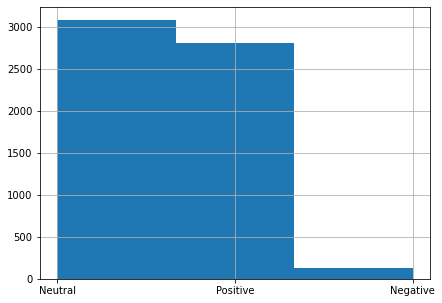

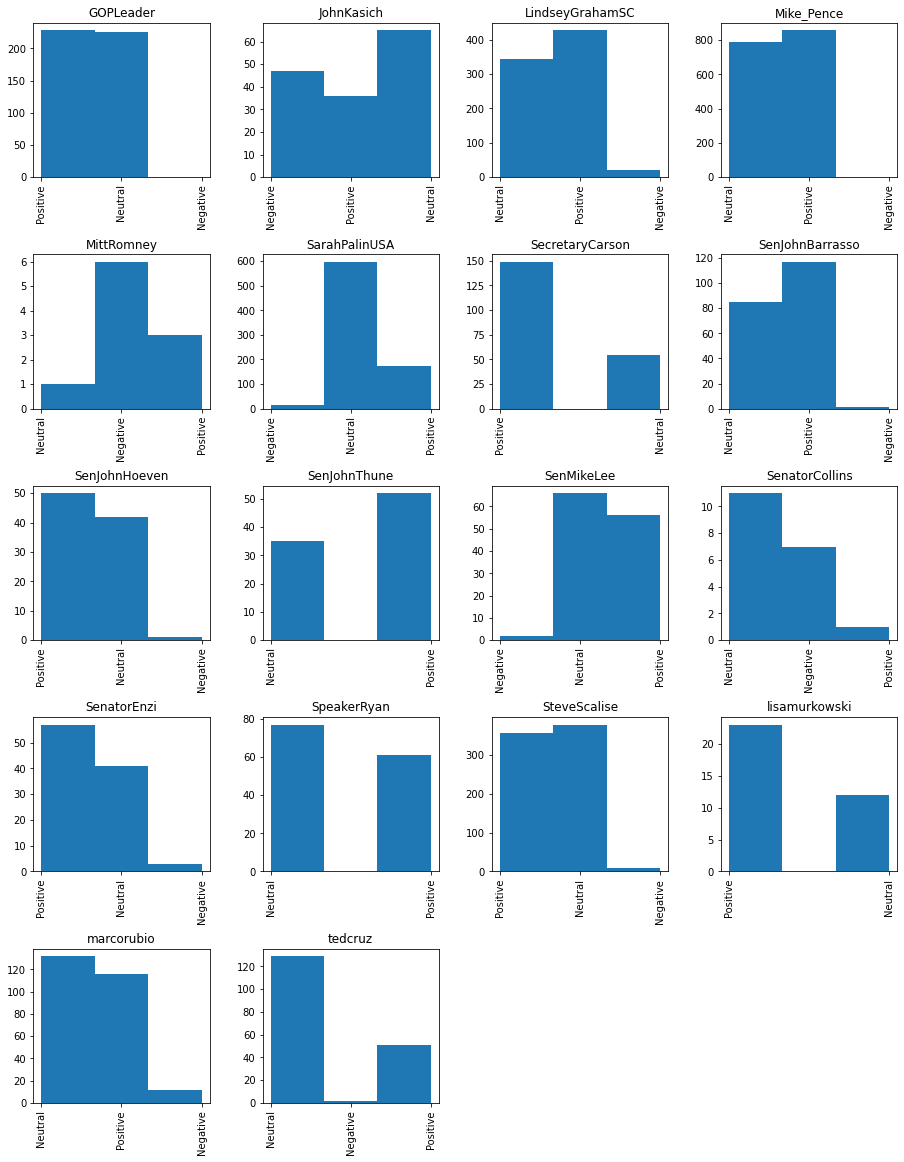

In [84]:
df_all['Label'].hist(bins = 3, figsize = (7,5));
df_all['Label'].hist(bins = 3, figsize = (15,20), by=df_all['politician_name']);

The final results of the analysis show a predominance of ‘neutral’ tweets (3082, which account for 51% of total tweets), followed by ‘positive tweets (2812, 47% of total tweets). 
Only 2% of tweets are labelled as negative. Our understanding of these findings is that very few politicians tend to tweet strong negative comments on Trump. Some mild negative comments may be written, but these are harder to be recognized as ‘negative’ by the code. John Kasich, Susan Collins, and Mitt Romney are the politicians with the highest number of ‘negative’ tweets regarding Trump. This comes as no surprise. John Kasich has openly expressed his preoccupation with Trump and Trump administration, and has publicly stepped up for Biden. Susan Collins has been defined as ‘Trump skeptic’, and has made no secret of her doubts regarding Trump and his administration. Mitt Romney delivered an ‘anti-Trump’ speach already in 2016, and he has used words such as ‘underdemocratic’, ‘gorilla’, and ‘dangerous’ to describe the ex-President throughout his administration. Marco Rubio and Lindsey Graham had openly criticized and opposed Trump, but endorsed him for the 2020 election. They both have some, even if few, ‘negative’ tweets. This can be explained by the fact that there has been an increase in the use of Twitter among politicians in the last years. Thus, most of the analysed tweets are recent, and reflect the new position towards Trump of the new politicians. 
Mike Pence, Ben Carson, Kevin McCarthy, Lindsey Graham, John Barrasso, John Hoeve, John Thune, Mike Enzi, and Lisa Murkowski appear to be strong Trump supporters, more positive than neutral tweets. An important clarification to be made, which represents an additional limitation of this analysis, is that politicians often write tweets to thank the ex-President for a specific tweet or enacted policy. These tweets are labeled as ‘positive’ during the sentiment analysis, even though they are rarely proof of a politician’s support to Trump. 

Overall, we think that the final result of this sentiment analysis does not provide significant insights into the approval/disapproval of Trump by Republican politicians, especially when compared to the well-known stances that several politicians have taken towards the ex-President. 

------

## 7. Download and filtering tweets of supporters

We would like to premise that several results are not printed as the size of the database did not allow it. In fact, given the excessive size, the single PC stopped working everytime we tried. So where possible we proceeded separately on different computers and then combined the results in retrospect. We would like to point out that obviously the model training was done on a single PC and on the entire training set.

### 7.1 Defining the userid to be considered republican supporters

Before proceeding with our analysis we need to define which users in `DB_Republicans_followers` could be defined as republican supporters. We select only the users which follows a minimum amount of politician profiles. We set this threshold at 13 accounts. Hence, if a user follows at least 13 out 18 accounts, this will be classified as republican supportes and his/her user_id will be stored in a database called `DB_Republicans_supporters`.

In [ ]:
# Here put your path to the existing database.
con = sqlite3.connect(base_dir + "DB_Republicans_followers")   
df = pd.read_sql('SELECT * FROM followers', con)  
print(f"Lines read: {df.shape}")

# We create a table of the number of repertition of unique values
counts = df.followerid.value_counts()   

# We create a list of tuples with the ID that appears at least 13 times
intersection_ID = [(k,) for k, v in counts.items() if v >= 13]  
print(f"List to insert length: {len(intersection_ID)}")

In [ ]:
# Creation of a new database
con = sqlite3.connect(base_dir + "DB_Republicans_supporters")
cur = con.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS followers (supporterid)')
con.commit()

# insert into table
cur.executemany('INSERT INTO followers VALUES (?)', (intersection_ID))
con.commit()

print("DONE!")

### 7.2 Download tweets of supporters

In [ ]:
# Import the list of supporters
con = sqlite3.connect(base_dir + "DB_Republicans_supporters")   
df = pd.read_sql('SELECT * FROM followers', con) 
foll = [i for i in df.supporterid]
print('Done')
print(len(foll))

As described before, the amount of data to be downloaded was too high to be downloaded just from one PC. Thus, each of us downloaded just a slice of the list `foll`. Here, for the sake of semplicity we write the code as if just one fetched all the tweets

In [ ]:
userid = foll

In [ ]:
# creation of new database
con = sqlite3.connect(base_dir + "DB_Supporters_tweets")
cur = con.cursor()
cur.execute('CREATE TABLE IF NOT EXISTS tweets(user_id, tweet_id, created_at, text, retweets, favorites, hashtags, links, mentions, media)')
con.commit()

In [ ]:
api = activelist[0]

i = 0

for hndl in userid:
    i += 1
    user_tweets = [] 
    try:
        for tweet in limit(tweepy.Cursor(api.user_timeline, id = hndl, since_id = start_date, max_id=end_date, tweet_mode="extended", count=200).pages()):
            for status in tweet:

                tweet = status.full_text.replace("\r", " ").replace("\n", " ").replace("\r\n", " ")
                
                hashtaglist=[hashtag["text"] for hashtag in status.entities["hashtags"]]
                hashtag_string=",".join(hashtaglist)
        
                linklist=[link["expanded_url"] for link in status.entities["urls"]]
                link_string=",".join(linklist)
        
                mentions=[mention["screen_name"] for mention in status.entities["user_mentions"]]
                mentions_string=",".join(mentions)
        
                try:
                    medialist=[media["expanded_url"] for media in status.entities["media"]]
                    media_string=",".join(medialist)
                except:
                    media_string='' 
                
                aux = (
                    hndl,
                    status.id, 
                    status.created_at, 
                    tweet,
                    status.retweet_count,
                    status.favorite_count,
                    hashtag_string,
                    link_string,
                    mentions_string,
                    media_string  
                        ) 
        
                user_tweets.append(aux)                              
                
    except:
        pass
        
    s_foll = set(user_tweets)
    user_tweets = list(s_foll)
    
    if i%10 == 0:
        print(f'For this user we downloaded {len(user_tweets)} tweets. Total of users processed: {i}')

    cur.executemany('INSERT INTO tweets VALUES (?,?,?,?,?,?,?,?,?,?)', (user_tweets))
    con.commit()
print("All tweets fetched")

We proceed with the filtering

### 7.3 Filtering for non-relevant tweets and Random sample creation

The filtering process was even more important in this case, than with politicians' tweets. Among the tweets we were able to fetch, many are 'Neutral', and they do not add value to our analysis. To avoid a possible misleading effect of these tweets on the labelling process, we try to remove as many of them as possible. One of the main issues we notice is the huge amount of retweets of Donald Trump, which would not add value to the analysis. We also delete tweets related to other members of the Trump family, and tweets coming from news sources, which did not present any negative or positive judgement about Trump. We remove tweets with the hashtag #obamagate since there is a great number of tweets with this hashtag, and the content of the tweets often led the code to label them as 'Negative', even though the negative comments were related to Obama and not Trump.

In [85]:
# Here are the two variables
keywords = ['^donald ',
            ' donald',
            '^trump ',
            ' trump',
            'potus',
            'President of the United States',
            'Our president',
            'maga2020',
            'maga',
            'trumppence2020',
            '@realDonaldTrump ',
            'notmypresident']
keywords_merge = '|'.join(keywords)

keywords_del =  ['@DonaldJTrumpJr',
                 '@EricTrump',
                 '@WhiteHouse',
                 '@CNN',
                 '@CNNPR',
                 '@CNNPolitics',
                 '@FoxNews',
                 'RT @realDonaldTrump',
                 '#Obamagate',
                 'RT @thehill',
                 '@cnnbrk',
                 '@guardian',
                 '@GoogleNews',
                 '@NBCNews',
                 '@ABC',
                 '@CBSNews',
                 '@foxnewsalert',
                 '@USAgov']
keywords_del_merge = '|'.join(keywords_del)

In [ ]:
# Connecting to the database with all the tweets
con = sqlite3.connect(base_dir + "DB_Supporters_tweets.db")
df = pd.read_sql("SELECT * FROM tweets", con)
print(f'df shape is {df.shape}')

In [ ]:
# We apply the function for filtering
new_df = filtering(df, keywords_merge, keywords_del_merge)
print(new_df.shape)

In [ ]:
# The merging part will actually invert the first two columns. We re-order the column for consistency
new_df = new_df[['user_id', 'tweet_id', 'created_at', 'text', 'retweets',
                  'favorites', 'hashtags', 'links', 'mentions', 'media']]

Before storing our filtered dataframe in a database, we want to extract a random sample of tweets that we will then manually labell. In reality, because each of us downloaded a slice of all the supporters tweets, we run this code on each individual database. We then collected all the labelled tweets in a Excel file named `Supporters_training_set`, which contains around three thousands tweets labelled.

In [ ]:
# Before storing our data in a DB, let's extract a random sample of 600 tweets for each group member
ind_max = new_df.index[-1] + 1

a = numpy.random.randint(0, ind_max, size=600)
df_rand = new_df.iloc[a, :]
print(f"df_rand shape is {df_rand.shape}")

df_rand.to_excel("RAND_SAMPLE.xlsx") # All the RAND_SAMPLE files have been put together and labelled
print("File excel created!")

The final training set (i.e. all the single "RAND_SAMPLE.xlsx" put together) is the following. It contains 2843 tweets manually labelled.

In [88]:
training_set = pd.read_excel(base_dir + "training_set_supporters.xlsx")
print(f'Training set shape for the sentiment analysis of Supporters is: {training_set.shape}')
training_set.head(1)

Training set shape for the sentiment analysis of Supporters is: (2843, 12)


,original_index,tweet_id,user_id,created_at,text,retweets,favorites,hashtags,links,mentions,media,Label
0,298553,889663681923043328,2864740036,2017-07-25 01:48:45,RT @realDonaldTrump: #2017Jambo- Remember your...,15695,0,2017Jambo,NaN,realDonaldTrump,NaN,Neutral


Let's keep a reduced set of columns. We will merge this reduced database with `DB_Supporters_tweets_filtered` in order to work on just one database.

In [89]:
training_set_merge = training_set[['tweet_id','user_id', 'created_at', 'text', 'Label']]
training_set_merge.head(1)

,tweet_id,user_id,created_at,text,Label
0,889663681923043328,2864740036,2017-07-25 01:48:45,RT @realDonaldTrump: #2017Jambo- Remember your...,Neutral


Before going on, we store all the filtered tweets in the database called `DB_Supporters_tweets_filtered`.

In [ ]:
# creation of new database
con = sqlite3.connect(base_dir + "DB_Supporters_tweets_filtered")  # INSERT PATH
cur = con.cursor()
cur.execute(
    "CREATE TABLE IF NOT EXISTS tweets(user_id, tweet_id, created_at, text, retweets, favorites, hashtags, links, mentions, media)"
)
con.commit()

# Transfrom Pandas Dataframe into tuples and insert into the db
output = new_df.itertuples(index=False)
data = tuple(output)
cur.executemany("INSERT INTO tweets VALUES (?,?,?,?,?,?,?,?,?,?)", (data))
con.commit()
print("Database created!")


print("ALL DONE")

Now, we can merge the labels into the main database.

In [86]:
# Retrieve again the database created.
con = sqlite3.connect(base_dir + "DB_Supporters_tweets_filtered.db")   
unlabelled = pd.read_sql('SELECT * FROM tweets', con)  
print(unlabelled.shape)
unlabelled.head(1)

(2081387, 10)


,user_id,tweet_id,created_at,text,retweets,favorites,hashtags,links,mentions,media
0,150381292,1296273691874123776,2020-08-20 02:31:46,Former President Obama: “I did hope that for t...,3,5,,,,


Let's concatenate the dataframes and then eliminate the duplicates keeping the last one. This way we will keep only the tweets in the main database and add the corresponding label whenever it is present in the second dataframe. Moreover, we keep only the relevant column to reduce the amount of data processed. We call the working dataframe `df`, which we will use for conducting our analysis.

In [90]:
frames = [unlabelled[['tweet_id','user_id', 'created_at', 'text']], training_set_merge]
df = pd.concat(frames, ignore_index=True)
print(df.shape)
df = df.drop_duplicates(subset=['tweet_id'], keep='last')
print(df.shape)
df.head(2)

(2084230, 5)
(2083850, 5)


,tweet_id,user_id,created_at,text,Label
0,1296273691874123776,150381292,2020-08-20 02:31:46,Former President Obama: “I did hope that for t...,NaN
1,1306073602014543872,33373162,2020-09-16 03:33:07,RT @MZHemingway: My favorite thing left-wing m...,NaN


### 7.4 Sentiment analysis of supporters

#### Visualization

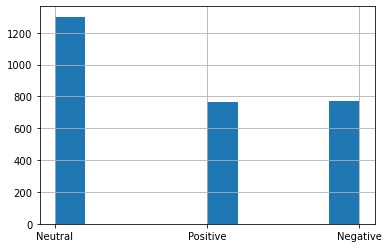

In [91]:
df['Label'].hist();

#### Text pre-processing

We take advantage of the function already defined above.

In [42]:
df['tweet_clean'] = df['text'].apply(CleanTweets)
df.head(3)

KeyboardInterrupt: 

#### Stemming

In [10]:
df['tweet_clean1'] = df['tweet_clean'].apply(stemming)

print(df.shape)
df.head(3)    

(2843, 7)


<ipython-input-10-1f066ff29fba>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells


,tweet_id,user_id,created_at,text,Label,tweet_clean,tweet_clean1
0,889663681923043328,2864740036,2017-07-25 01:48:45,RT @realDonaldTrump: #2017Jambo- Remember your duty. Honor your history. Take care of the people God puts into your life – and LOVE &amp; CHERI…,Neutral,rt remember duty honor history take care people god puts life love amp cheri,rt rememb duti honor histori take care peopl god put life love amp cheri
1,832256988956368896,3375089354,2017-02-16 15:55:03,"RT @realDonaldTrump: The Democrats had to come up with a story as to why they lost the election, and so badly (306), so they made up a stor…",Neutral,rt democrats come story lost election badly made stor,rt democrat come stori lost elect badli made stor
2,1263162616840684032,76392970,2020-05-20 17:40:10,"CaughtOurEye: @JasonMillerinDC, chief spokesmen to @realDonaldTrump's 2016 campaign and presidential transition, registers as a first-time lobbyist https://t.co/j3Q4NNBnGM",Neutral,caughtoureye chief spokesmen campaign presidential transition registers firsttime lobbyist,caughtourey chief spokesmen campaign presidenti transit regist firsttim lobbyist
3,903342025604464640,57751453,2017-08-31 19:41:36,WH's Sarah Sanders says President Trump is pledging $1 million of his own personal money to help the people of both TX &amp; LA #Harvey,Positive,whs sarah sanders says president trump pledging million personal money help people tx amp la,wh sarah sander say presid trump pledg million person money help peopl tx amp la
4,1191085013732937984,700720095543185408,2019-11-03 20:09:31,Chomsky: Trump’s Actions on Syria Reflect the Foreign Policy of a Con Man https://t.co/6lp60kqINb via @truthout,Negative,chomsky trumps actions syria reflect foreign policy con man via,chomski trump action syria reflect foreign polici con man via


#### Collocations

In [12]:
words=list(df['tweet_clean1'].str.split(' ', expand=True).stack())
print ("There are %s words in our corpus" %(len(words)))

There are 31937 words in our corpus


In [13]:
finder = BigramCollocationFinder.from_words(words)
bgm = BigramAssocMeasures()
collocations = [b for b, f in finder.score_ngrams(bgm.mi_like) if f > 1]
print("Found %s collocations: %s ..." % (len(collocations), collocations[:10]))

Found 83 collocations: [('presid', 'trump'), ('joe', 'biden'), ('unit', 'state'), ('fake', 'news'), ('white', 'hous'), ('suprem', 'court'), ('nanci', 'pelosi'), ('ami', 'coney'), ('puerto', 'rico'), ('coney', 'barrett')] ...


In [15]:
df["corpus"]=df["tweet_clean1"].apply(apply_collocations, set_colloc=collocations)
print (df.shape)
df["corpus"].head(3)

0     rt rememb duti honor histori take care peopl god put life love amp cheri                                                                                       
1     rt democrat come stori lost elect badli made stor                                                                                                              
2     caughtourey chief spokesmen campaign presidenti transit regist firsttim lobbyist                                                                               
3     wh sarah sander say presid_trump pledg million person money help peopl tx amp la                                                                               
4     chomski trump action syria reflect foreign polici con man via                                                                                                  
5                                                                                                                                                                    
6   

(2843, 8)

#### Split into train and test samples

In [92]:
labelled = df[df['Label'].notna()]
print(labelled.shape)
print ("We have",len(labelled), "labelled tweets annotated out of",len(df), "total tweets")

(2837, 5)
We have 2837 labelled tweets annotated out of 2083850 total tweets


In [17]:
X=labelled["corpus"]
Y = labelled['Label']

In [18]:
#test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [19]:
print (len(X_train))
print (len(y_train))

print (len(X_test))
print (len(y_test))

1990
1990
853
853


#### Representing each tweet as a vector 

In [20]:
X_train_counts = X_train.apply(lambda x: Counter(x.split(' ')))
print (X_train_counts.head())


1160    {'rt': 1, 'presid': 1, 'kill': 1, 'hundr': 1, 'thousand': 1, 'alot': 1, 'respect': 1, 'gov': 1, 'cuomo': 1}                                          
1280    {'rt': 1, 'could': 1, 'week': 1, 'get': 1, 'better': 1, 'ye': 1, 'give': 1, 'amaz': 1, 'sotu': 1, 'address': 1, 'follow': 1, 'full': 1, 'acquitt': 1}
2114    {'wish': 1, 'potu': 1, 'flotu': 1, 'amp': 1, 'other': 1, 'fight': 1, 'covid': 1, 'speedi': 1, 'recoveri': 1, 'biden': 1}                             
759     {'complet': 1, 'unawar': 1, 'stupid': 1, 'potu': 1, 'thank': 1}                                                                                      
660     {'readi': 1, 'nightmar': 1, 'trump': 1, 'presid': 1, 'gone': 1}                                                                                      
Name: corpus, dtype: object


In [21]:
document_features = DictVectorizer()
# tfidfvectorizer

X_train_bow = document_features.fit_transform(X_train_counts)

print(X_train_bow.shape)

In [23]:
X_test_counts = X_test.apply(lambda x: Counter(x.split(' ')))

X_test_bow=document_features.transform(X_test_counts)
print(X_test_bow.shape)

(853, 4720)


#### Select the best classification modelprint(X_train_bow.shape)

In [29]:
Classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    MultinomialNB(),
    BernoulliNB(),
    SVC(kernel="rbf", C=0.025, probability=True),
    LinearSVC(),
    NuSVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier()]

In [30]:
Accuracy=[]
Model=[]
for classifier in Classifiers:
    fit = classifier.fit(X_train_bow, y_train)
    pred = fit.predict(X_test_bow)
    accuracy = accuracy_score(pred,y_test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  

Accuracy of LogisticRegression is 0.552168815943728
Accuracy of KNeighborsClassifier is 0.44431418522860494
Accuracy of MultinomialNB is 0.5556858147713951
Accuracy of BernoulliNB is 0.5252051582649473
Accuracy of SVC is 0.4536928487690504
Accuracy of LinearSVC is 0.5322391559202814
Accuracy of NuSVC is 0.567409144196952
Accuracy of DecisionTreeClassifier is 0.45720984759671746
Accuracy of RandomForestClassifier is 0.5345838218053928
Accuracy of AdaBoostClassifier is 0.5017584994138335


In [31]:
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train) 

MultinomialNB()

In [26]:
preds = classifier.predict(X_test_bow)

print (preds[:15])


['Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral'
 'Negative' 'Neutral' 'Neutral' 'Negative' 'Neutral' 'Negative' 'Neutral'
 'Positive']


In [27]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    Negative       0.58      0.36      0.44       255
     Neutral       0.57      0.73      0.64       387
    Positive       0.51      0.48      0.49       211

    accuracy                           0.56       853
   macro avg       0.55      0.52      0.52       853
weighted avg       0.56      0.56      0.54       853



Our classifier has an accuracy of 0.56. Every further analysis should take into account this fact and weight each result in light of this number. 

#### Making predictions on unlabelled tweets

In [94]:
unlabelled = df[df['Label'].isna()]
print(unlabelled.shape)
print ("We have",len(unlabelled), "unlabelled tweets annotated out of",len(df), "total tweets")
unlabelled.head(2)

(2081013, 5)
We have 2081013 unlabelled tweets annotated out of 2083850 total tweets


,tweet_id,user_id,created_at,text,Label
0,1296273691874123776,150381292,2020-08-20 02:31:46,Former President Obama: “I did hope that for t...,NaN
1,1306073602014543872,33373162,2020-09-16 03:33:07,RT @MZHemingway: My favorite thing left-wing m...,NaN


In [139]:
#2. Vectorizing
new_x_counts = unlabelled["corpus"].apply(lambda x: Counter(x.split(' ')))
new_X_bow=document_features.transform(new_x_counts)

In [140]:
#3. Making predictions
new_preds=classifier.predict(new_X_bow)
print (len(new_preds))
print (len(unlabelled))

In [142]:
unlabelled["Label"] = new_preds
print (unlabelled.columns.tolist())

['tweet_id', 'user_id', 'created_at', 'text', 'tweet_clean', 'tweet_clean1', 'corpus', 'predicted_sentiment']


In [ ]:
labelled_clean = labelled[["tweet_id","user_id","created_at","text","corpus","Label"]]
unlabelled_clean = unlabelled[["tweet_id","user_id","created_at","text","corpus","Label"]]

# Concatenating the Pandas dataframes
frames = [labelled_clean, unlabelled_clean]
df_all = pd.concat(frames, ignore_index=True)
print(df_all.shape)
df_all.head(3)

In [146]:
# Let's now store all the data in a SQL Database

# creation of new database
con = sqlite3.connect(base_dir + "DB_Supporters_tweets_labelled.db")
cur = con.cursor()
cur.execute(
    "CREATE TABLE IF NOT EXISTS tweets(tweet_id, user_id, created_at, text, corpus, Label)"
)
con.commit()

In [147]:
# Transfrom Pandas Dataframe into tuples and insert into the db
output = df_all.itertuples(index=False)
data = tuple(output)
cur.executemany("INSERT INTO tweets VALUES (?,?,?,?,?,?)", (data))
con.commit()
print("Database created!")


print("ALL DONE")

Database created!
ALL DONE


#### Data visualization

In [103]:
df_all[['Label']].value_counts()

Label   
Neutral     3082
Positive    2812
Negative    133 
dtype: int64

We write the code for plotting the results in a functional way. In particular, we group the labels by semester and plot the number of positive and negative tweets. We also add on top of each bar the percentage on the total (i.e. also including in this case the Neutral labelled tweets).

While running the code on Jupyter, one of the laptops used gave a small error concerning the labels on the x-axis, while the other laptops did not give this problem. When the code is run on Spyder the error is never present. We insert a copy of the final graph in the Spyder output.

In [95]:
#Define the object attributes
class Data:
    def __init__(self, createdAt, label):
        self.createdAt = createdAt
        self.label = label
 
#Connect to database function
def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("-> Connection successful!")
    except:
        print("ERROR")

    return conn

In [96]:
#Import data and create a list of objects
def import_data(con):
    df = pd.read_sql('SELECT created_at, Label FROM tweets', con)
    datas = []
    datas.clear()
    print("-> Importing data (can take a while)...")
    for row in df.values:
        data = Data(datetime.datetime.strptime(row[0], '%Y-%m-%d %H:%M:%S'), row[1]) #[created_at, predicted_sentiment] -> into Data object
        datas.append(data)
    
    return datas

#Sort data by date (from oldest to newest)     
def sort_data(datas):
    datas.sort(key=lambda x: x.createdAt)
    print("-> Sorting data...")
    return datas


def elaborate_data(datas, monthsVar):
    x_label_years = [] #List to manage the division in subperiods
    print("-> Elaborating data...")
    index = 1 #Every index indicates a 6-month cluster
    labels = [] #Will be the nested list
    loclabels = []
    x_label_years.append(str(datas[0].createdAt.year))
    for data in datas:
        filterVar = datetime.datetime(datas[0].createdAt.year, 1, 1) + datetime.timedelta(days=29*monthsVar*index) #Filter, every time the loop is repeated you move to the following 6 months
        date = data.createdAt
        if(date < filterVar):
            loclabels.append(data)
        else:
            labels.append(loclabels)
            loclabels = []
            print("\t-> New section - ", index)
            loclabels.append(data)
            x_label_years.append(str((datetime.datetime(datas[0].createdAt.year, 1, 1) + relativedelta(months=+(monthsVar*index))).year))
            index = index + 1
            
    #print(labels[0][12].createdAt)
    print("-> Elaborating results")
    posResult = [] #index 0 is number of positive in the first 6 months, index 1 is between 6 and 12 and so on
    negResult = []
    totResult = []
    for group in labels:
        positive = 0
        negative = 0
        for item in group:
            label = item.label
            if(label == "Positive"):
                positive = positive + 1
            elif(label == "Negative"):
                negative = negative + 1
        posResult.append(positive)
        negResult.append(negative)
        totResult.append(len(group))
    
    draw_graph(posResult, negResult, totResult, x_label_years)
   

In [98]:
#Create graph
def draw_graph(positive, negative, total, x_label_years):
    
    N = len(total)
    
    ind = np.arange(N) 
    width = 0.4       
    pos = plt.bar(ind, positive, width, label='Positive', color='#1c0c78')
    neg = plt.bar(ind + width, negative, width, label='Negative', color='#BF0D3E')

#Compute and print percentage on top of each column    
    i=0
    for rect in pos:
        height = rect.get_height()
        perc = float((height/total[i])*100)
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % perc, ha='center', va='bottom')
        i = i+1
        
    i=0
    for rect in neg:
        height = rect.get_height()
        perc = float((height/total[i])*100)
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % perc, ha='center', va='bottom')
        i = i+1
    
    plt.ylabel('Tweets')
    plt.title('Sentiment Analysis on Tweets about Trump')
    
    plt.xticks(ind + width / 2, tuple(x_label_years))
    plt.legend(loc='best')


    plt.savefig("Sentiment Analysis on Tweets about Trump.pdf")
    plt.show()
      

-> Connection successful!
-> Importing data (can take a while)...
-> Sorting data...
-> Elaborating data...
	-> New section -  1
	-> New section -  2
	-> New section -  3
	-> New section -  4
	-> New section -  5
	-> New section -  6
	-> New section -  7
	-> New section -  8
-> Elaborating results


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (9).

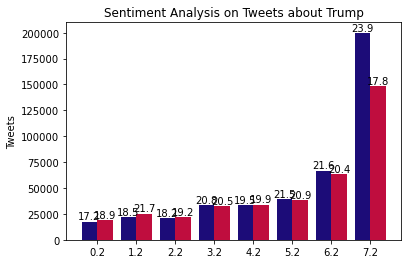

In [99]:
#Change variables (time and path) from here if needed  
path = base_dir + "DB_Supporters_tweets_labelled.db"
timeDelta = 6 #in months
    
conn = create_connection(path)
datas = sort_data(import_data(conn))
elaborate_data(datas, timeDelta)

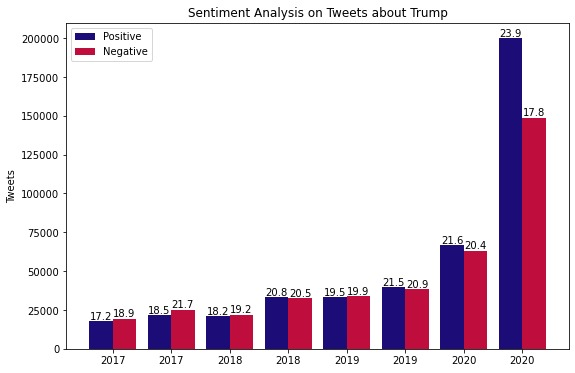

As we can see from the graph, Republican supporters seem to be equally split between pro-Trump and anti-Trump. This division within the Republican party has been largely discussed, and a Wall Street Journal article [2] describes the presence of two factions: Party Republicans and Trump Republicans. We decided not to include the 'neutral' tweets in the graph, since they do not add value to our analysis.

The numbers above the columns represent the percentages of 'positive' or 'negative' tweets with respect to the total tweets (thus, considering also 'neutral'). We included this number to show how the absolute number of tweets has largely increased over time, but the relative portion of 'positive' and 'negative' tweets has just slightly fluctuated. 'Positive' tweets went from 17.2% in the first half of 2017, to 23.9% in the second half of 2020. 'Negative' tweets moved from 18.9% in the first half of 2017 to 17.8% in the second half of 2020. The increase in the total number of tweets over time is an important element to be considered for the interpretation of the results. As a matter of fact, the Twitter discussion has become more and more active in the last years, thus we believe that the more recent tweets give a better representation of the real sentiment, rather than the old ones.

There is, overall, an increase in 'positive' tweets, especially noticeable between 2018 and 2019, when 'positive' tweets increased from 18.2% in the second half of 2018, to 20.8% in the first half of 2019. The increase in the second half of 2020 is important as well, here 'positive' tweets increase to 23.9% from 21.6% of the first part of the year. This boost can be interpreted in light of the elections scheduled for November 3. This is interesting if we consider that before the elections the general idea was that positive sentiment towards Trump had largely decreased during his 4 years of presidency. Pre-election polls gave a sure and strong victory to Biden, which has not been the case in the real election. The election has turned out to be much closer than what polls were predicting. Hence, post elections, we are not surprised to see that support to Trump has not decreased.

---

## 8. Conclusion

Throughout our analysis on Twitter accounts of major Republican politicians, we were able to gain some insights on the variety of opinions within the Grand Old Party and the different sentiments towards Trump. 

First, the clout and vulnerability analysis clearly identified some divisions between the Republican politicians into smaller party’s factions based on their levels of similarity, which was represented by the high number of followers in common among them. We noticed mainly four different factions within the GOP: far-right and Tea Party, neoconservative, moderate-liberal and swing-voters. 

Then, the positioning maps analysis confirmed a certain plurality of views within the party in major aspects of the US policies: social issues, environmental issues, and openness to the world. On the one hand, the maps regarding social and environmental issues pointed out the various sensibilities of the GOP politicians, from conservative to more moderate positions. On the other hand, the last positioning map regarding the openness to the world showed that the majority of Republican politicians are leaning more and more against free trade, most probably influenced and convinced by Trump’s opinions and policies.

The sentiment analysis on Trump-related tweets by the 18 selected politicians did not provide us significant insights. Probably due to the structure of the analysis and of the data we used, there seems to be an overwhermingly positive sentiment towards the former US President. However, our analysis has a lot of limitations, and for this reason we do not treat the result as significant. 

Finally, our main sentiment analysis focused on tweets of Republican supporters from 2017 to 2020. This analysis showed a mixed feeling about Trump with almost the same amount of 'positive' and 'negative' tweets. The division into pro- and anti-Trump Republicans is in line with what has been discussed by previous studies, and it exacerbates those differences within the Republican party that we pointed out through the other analysis.

After Donald Trump’s loss at the US presidential election in November, there is now the question in which direction the party will go once he leaves the White House. Trump has significantly changed the GOP over the past four years, going from socially conservative to populist leaning. The party will most likely not go back to pre-Trump ways. Another interesting fact will be to check whether the new Republican voters widened by Trump during his presidency are only loyal to Trump or will remain loyal to the Republican Party even after Trump [3].

----

## References
[1] D. Mutz. (2017) _Changing Party Alignments in American Attitudes Toward Trade: Reflections of the Past, Implications for the Future_ The Future of the Global Order Colloquium. Accessed at https://global.upenn.edu/sites/default/files/go-changing-party-mutz.original.pdf on Nov 18th, 2020

[2] A. Zitner, G. Gianordoli. (May 1, 2018) _How Trump Unites and Divides Republicans_ , Wall Street Journal
https://www.wsj.com/graphics/how-trump-unites-and-divides-republicans/ Accessed on Nov 4th, 2020

[3] C. Bleiker. (November 13th 2020). _After Trump's loss: What does the future hold for Republicans?_ DW News https://www.dw.com/en/after-trumps-loss-what-does-the-future-hold-for-republicans/a-55595441 Accessed on Nov 13th, 2020